<a href="https://colab.research.google.com/github/lucasabbade93/Data_science/blob/main/MVP_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A) Definição do problema**

O objetivo deste projeto é entender quais são as variáveis que afetam o preço das acomodações do Airbnb em diversas cidades européias. A partir deste dataset será construído um modelo de Machine Learning de aprendizado supervisionado, uma vez que há uma variável de saída ('Price') e diversas variáveis de entrada ('Day',	'Room Type', 'Person Capacity', 'Bedrooms', 'City Center (km)', 'Metro Distance (km)', ...).

A hipótese levantada neste projeto é: o Preço das acomodações é afetado pela localização, capacidade de pessoas, tipo de acomodação, cidade, dentre outras variáveis.

O dataset analisado está restrito à uma amostra de acomodações Airbnb de 9 cidades européias, como será mostrado a adiante.

> Definição dos atributos do Dataset:

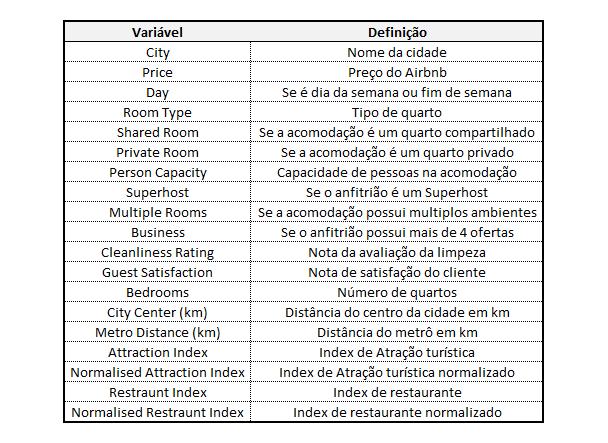

___________________________________________________________





**B) Análise de dados**

> 1) Importação de Biblitecas


In [257]:
# importar bibliotecas
import pandas as pd
pd.set_option('display.max_columns', None) # mostrar todas as colunas nos dataframes
import matplotlib.pyplot as plt
import matplotlib as mlt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from scipy import stats as stt
from matplotlib.cbook import boxplot_stats
from scipy.stats import gaussian_kde
from matplotlib.ticker import MaxNLocator, FixedLocator

> 2) Importação de dados

In [258]:
# url dos dados no github
url = "https://raw.githubusercontent.com/lucasabbade93/Data_science/main/Aemf1.csv"

# importação dos dados
df = pd.read_csv(url)

In [259]:
# verificar as primeiras linhas
df.head(10)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,Amsterdam,552.808567,Weekday,Private room,False,True,3.0,False,0,0,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,Amsterdam,215.124317,Weekday,Private room,False,True,2.0,False,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
7,Amsterdam,2771.307384,Weekday,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
8,Amsterdam,1001.804420,Weekday,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686
9,Amsterdam,276.521454,Weekday,Private room,False,True,2.0,False,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478


Ao analisar as primeiras linhas do dataset, observa-se que algumas variáveis podem conter as mesmas informações que outras, como por exemplo 'Room type' e 'Shared Room' e 'Private Room', além de 'Attraction Index' e 'Normalised Attraction Index' e também 'Restraunt Index' e 'Normalised Restraunt Index'. 

In [260]:
# tamanho do dataset
df.shape

(41714, 19)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

Observa-se que o Dataset possui 19 colunas e 41.714 linhas. A variável dependente é 'Price', a qual será definida em função das demais 18 possíveis variáveis explicativas. Dentre essas 18 variáveis explicativas, 6 são categóricas e 12 são númericas. Dentre as 6 categóricas, 3 são booleanas (True ou False) e 3 são objeto (string). Dentre as 12 numéricas, 9 são números reais (float) e 3 são inteiros (int). Por fim, destaca-se que nenhuma variável apresenta valores nulos (missing).

> **I - Analise da Variável Dependente (Price)**

Upper whisker: 527.3091620840712
Q3: 297.3733583489681
Q2: 203.8192740107052
Q1: 144.01608491337993
Lower whisker: 34.77933919255534

Max: 18545.450284723363
Mean: 260.09442261413653
Min: 34.77933919255534


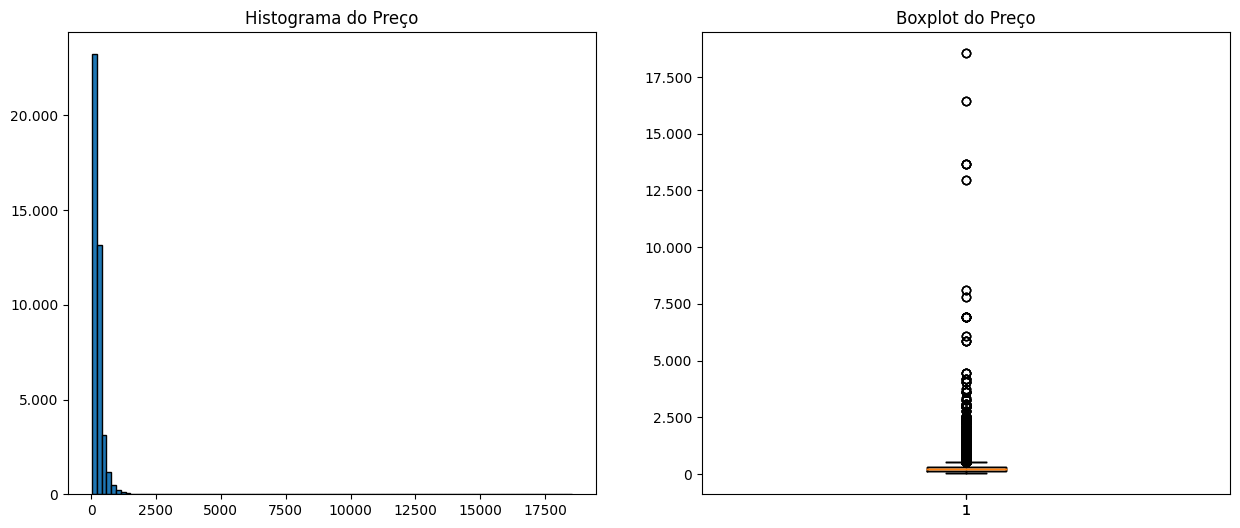

In [262]:
# Figura com dois gráficos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Histograma no grafico 1
ax1.hist(df['Price'],edgecolor='black', bins=100)
ax1.set_title('Histograma do Preço')
# trocar o separador dos milhares ',' por '.' no eixo y
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))

# Boxplot no grafico 2
ax2.boxplot(df['Price'])
ax2.set_title('Boxplot do Preço')
# trocar o separador dos milhares ',' por '.' no eixo y
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))

# Definir whiskers
whisker_ends = [whisker.get_ydata() for whisker in plt.boxplot(df['Price'])['whiskers']]
upper_whisker = whisker_ends[1][1]
lower_whisker = whisker_ends[0][1]

# Definir quartis
q1, q2, q3 = np.percentile(df['Price'], [25, 50, 75])
plt.boxplot(df['Price'])


# printar os valores de estatisticas descritivas
print(f"Upper whisker: {upper_whisker}")
print(f"Q3: {q3}")
print(f"Q2: {q2}")
print(f"Q1: {q1}")
print(f"Lower whisker: {lower_whisker}")
print()
print(f"Max: {df['Price'].max()}")
print(f"Mean: {df['Price'].mean()}")
print(f"Min: {df['Price'].min()}")

# Plot
plt.show()

Ao observar os gráficos acima, fica evidente a presença de outliers que estão dificultando a visualização do histograma e do boxplot. Em seguida os outliers seão tratados.

In [263]:
# Remover outliers
df_1 = df[(df['Price'] > lower_whisker) & (df['Price'] < upper_whisker)].reset_index(drop=True)

# Printar o tamanho antes e depois
print("Base Total")
print(df['Price'].count())
print()
print("Após remoção de Outliers")
print(df_1['Price'].count())

print()
print("Queda %")
print(((df_1['Price'].count()/df['Price'].count())-1)*100)

Base Total
41714

Após remoção de Outliers
38819

Queda %
-6.940116028191978


Optou-se pela remoção destes outliers pois eles possuíam Preço muito acima da média e representavam menos de 7% da base.

Max: 18545.450284723363
Mean: 260.09442261413653
Min: 34.77933919255534


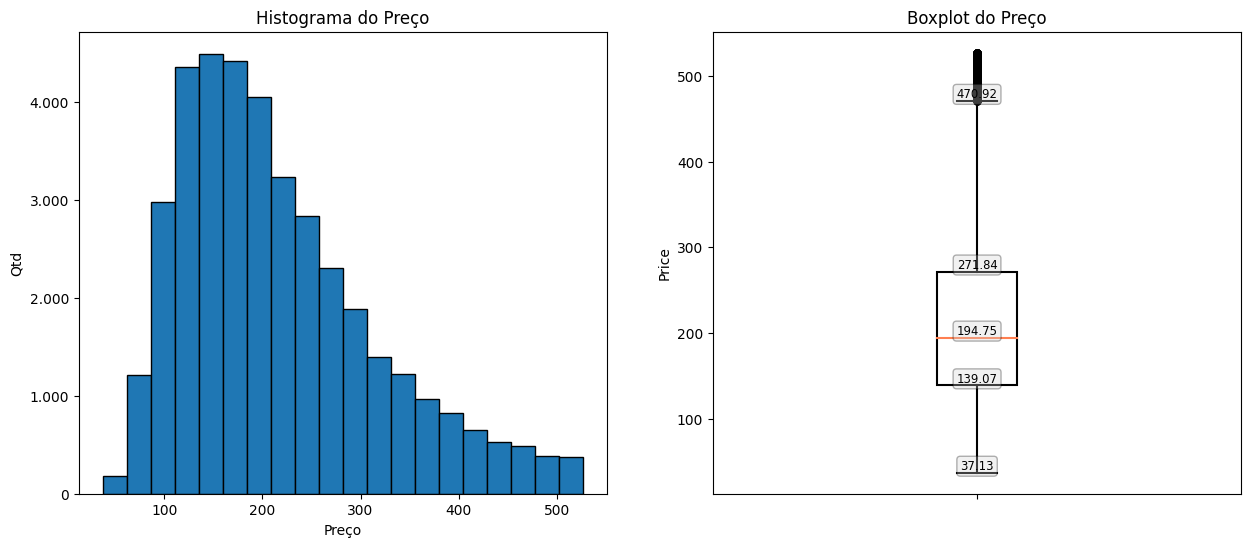

In [264]:
# City: ordenadar do maior apara o menor em Preço médio de acomodação
city_price_mean = df_1.groupby('City')['Price'].mean().reset_index(name='Price_mean').sort_values('Price_mean', ascending=False)

# Figura com 2 gráficos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

#### Gráfico 1: Histograma do Preço
ax1.hist(df_1['Price'],edgecolor='black', bins=20)
ax1.set_title('Histograma do Preço')
# titulos
ax1.set_title('Histograma do Preço')
ax1.set_xlabel('Preço')
ax1.set_ylabel('Qtd')
# trocar o separador dos milhares ',' por '.' no eixo y
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# Remover as linhas de grade
ax1.grid(False)


#### Gráfico 2: Boxplot do preço
### Datalabels para o Boxplot
# 1. Dataframe somente com a coluna Preço
transpor = pd.DataFrame(df_1['Price'])
# 2. Extrair os valores das estatísticas do boxplot
transpor_stat = [boxplot_stats(transpor[col].dropna().values)[0] for col in transpor.columns]
# 3. Criar dataframe das estatísticas
stats = pd.DataFrame(transpor_stat, index=transpor.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)

# Gráfico
box_plot = sns.boxplot(y='Price', data=df_1, ax=ax2, order=df_1.groupby(['City'])['Price'].mean().sort_values(ascending = False).index
, width = 0.15, color = 'w', flierprops={"marker": "o", 'markerfacecolor': 'black', 'markeredgecolor': 'black'}
, medianprops={"color": "coral"}, boxprops=dict(edgecolor='black')
, whiskerprops={'color': 'black'}
,capprops={'color': 'black'})
ax2.set_title('Boxplot do Preço')
# Inserir os Datalabels do Boxplot
for xtick in box_plot.get_xticks():
    for col in stats.columns:
        box_plot.text(xtick, stats[col][xtick], stats[col][xtick], horizontalalignment='center', verticalalignment='bottom', size='small', color='black', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
# trocar o separador dos milhares ',' por '.' no eixo y
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# Remover as linhas de grade
ax2.grid(False)

# printar max, min e média
print(f"Max: {df['Price'].max()}")
print(f"Mean: {df['Price'].mean()}")
print(f"Min: {df['Price'].min()}")

plt.show()

In [265]:
# Teste de Normalidade do Preço
k2, p  = stt.normaltest(df_1['Price'])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < 0.05:
    print("A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)")
else:
    print("A hipótese nula não pode ser rejeitada (Segue distribuição Normal)")

A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)


In [266]:
# Estatisticas Descritivas do preço
print('Estatísticas descritivas Base total')
print(df['Price'].describe())

print()
print()

print('Estatísticas descritivas depois de remover outliers')
print(df_1['Price'].describe())

Estatísticas descritivas Base total
count    41714.000000
mean       260.094423
std        279.408493
min         34.779339
25%        144.016085
50%        203.819274
75%        297.373358
max      18545.450285
Name: Price, dtype: float64


Estatísticas descritivas depois de remover outliers
count    38819.000000
mean       216.197808
std         99.952999
min         37.129295
25%        139.073931
50%        194.749024
75%        271.835588
max        527.076149
Name: Price, dtype: float64


Após a remoção dos outliers o máximo e o mínimo ficam com os valores próximos aos whiskers usados como linha de corte. A média ficou em torno de 216 com desvio padrão de 99 (com uma queda de 64% em relação ao valor original). Destaca-se que 75% das acomodações possuem preço de 37 a 271.

A distribuição da variável preço é Assimétrica à Direita.


> **II - Analise das Variáveis Explicativas**

>> 1) Estatísticas Descritivas

In [267]:
# analisar estatísticas descritivas das variáveis (variáveis numéricas): base total
df.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [268]:
# analisar estatísticas descritivas das variáveis (variáveis numéricas): excluindo outliers
df_1.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,38819.000000,38819.000000,38819.000000,38819.000000,38819.000000,38819.000000,38819.000000,38819.000000,38819.000000,38819.000000,38819.000000,38819.000000,38819.000000
mean,216.197808,3.171591,0.300265,0.340246,9.442927,93.063629,1.128313,2.702013,0.610273,285.261517,11.143962,617.586068,24.598554
std,99.952999,1.271444,0.458379,0.473798,0.888705,8.125197,0.604606,2.012625,0.715094,233.243625,7.929890,523.694574,18.006916
min,37.129295,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.034661,0.002301,15.152201,0.926301,19.576924,0.592757
25%,139.073931,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.288322,0.241227,120.989435,5.284819,203.033114,10.434680
50%,194.749024,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.275902,0.396649,220.484109,9.511416,503.194194,20.802306
75%,271.835588,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.611122,0.683034,377.343377,14.686939,840.559261,35.356467
max,527.076149,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


Percebe-se que com a retirada dos outliers não houve praticamente nenhuma mudança nas estatisticas descritivas das variáveis explicativas (média, desvio padrão, quartis, min e max).

>> 2) Análise das Variáveis Qualitativas

>>> 2.1) Cidades (City)







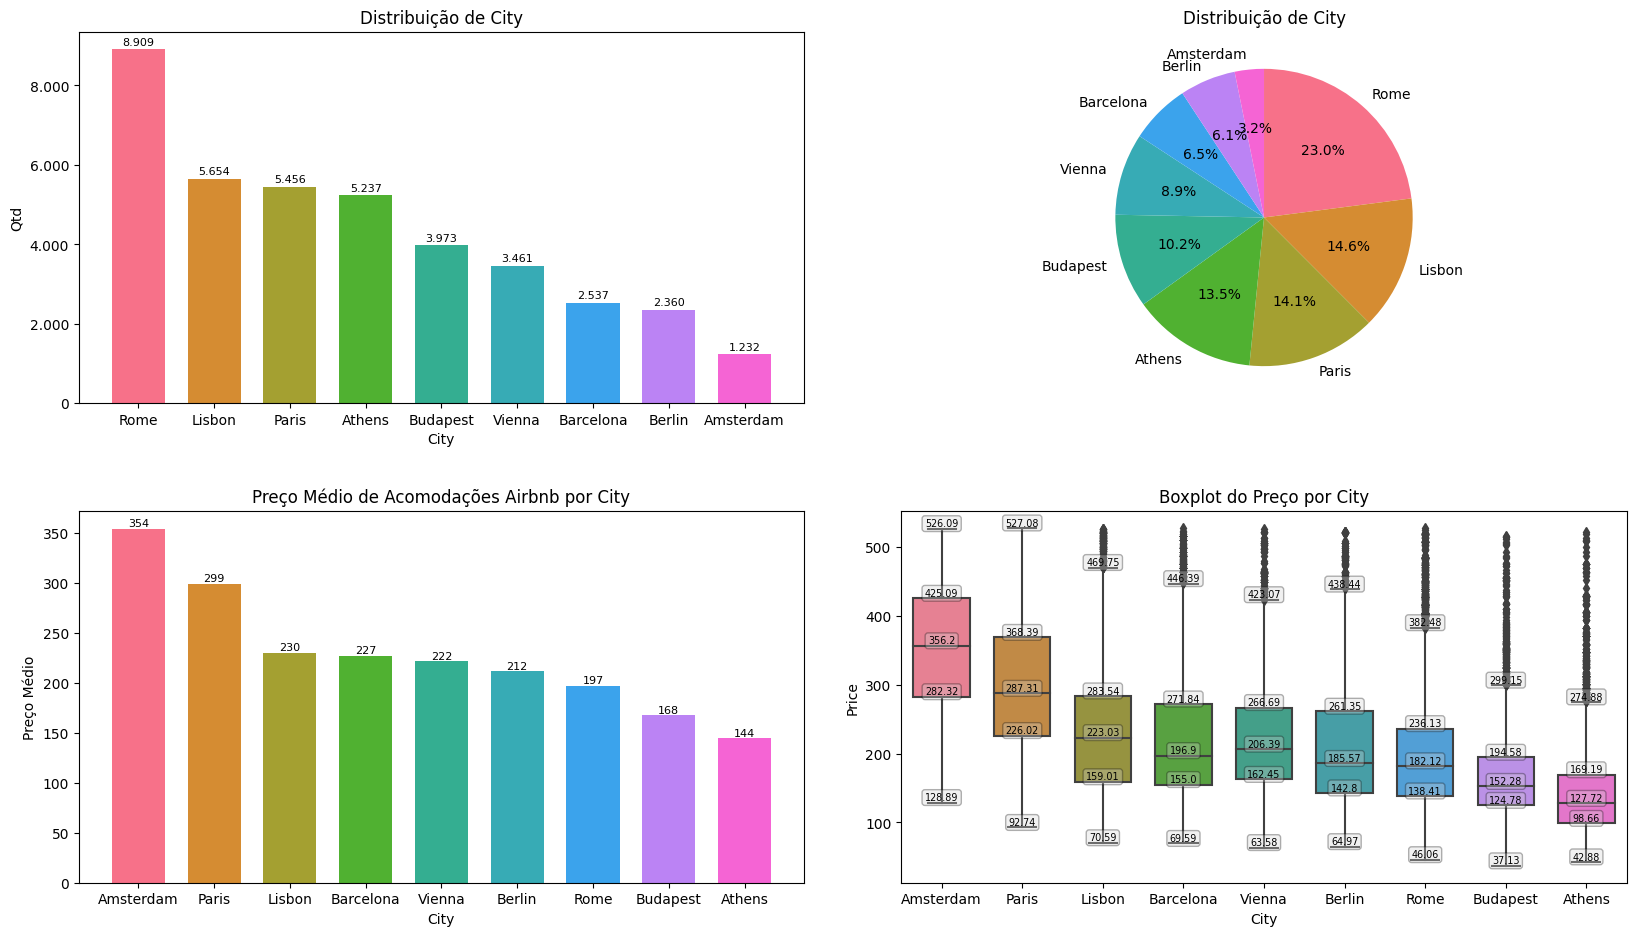

In [269]:
#variável analisada
var = 'City'

# Dataframe agrupado pela variável analisada com contagem de registros
counts = df_1.groupby(var).size().reset_index(name='Counts').sort_values('Counts', ascending=False)

# Figura com 4 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17, 10))

#### Gráfico 1: Barras com distribuição da variável analisada
axs[0, 0].bar(counts[var],counts['Counts'],color= sns.color_palette("husl", 9), width=0.7)
# titulos
axs[0, 0].set_title(f"Distribuição de {var}")
axs[0, 0].set_xlabel(var)
axs[0, 0].set_ylabel('Qtd')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(counts['Counts']):
    axs[0, 0].text(i, v + 50, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[0, 0].grid(False)

#### Gráfico 2: Pizza com distribuição da variável analisada (valor em %)
axs[0, 1].pie(counts['Counts'],labels=counts[var], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 9), counterclock=False )
axs[0, 1].set_title(f"Distribuição de {var}")


# Dataframe agrupado pela variável analisada com a média do preço
price_mean = df_1.groupby(var)['Price'].mean().reset_index(name='Price_mean').sort_values('Price_mean', ascending=False)


#### Gráfico 3: Barras com preço médio da variável analisada
axs[1, 0].bar(price_mean[var],price_mean['Price_mean'],color= sns.color_palette("husl", 9), width=0.7)
# titulos
axs[1, 0].set_title(f"Preço Médio de Acomodações Airbnb por {var}")
axs[1, 0].set_xlabel(var)
axs[1, 0].set_ylabel('Preço Médio')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(price_mean['Price_mean']):
    axs[1, 0].text(i, v + 0, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[1, 0].grid(False)



#### Gráfico 4: Boxplot do preço da variável analisada
### Datalabels para o Boxplot
# 1. Transpor a variável analisada para colunas  e manter preço nas linhas
transpor = df_1.pivot(columns=var, values='Price')
# 2. Extrair os valores das estatísticas do boxplot para cada variável analisada
transpor_stat = [boxplot_stats(transpor[col].dropna().values)[0] for col in transpor.columns]
# 3. Criar dataframe das estatísticas para cada variável analisada
stats = pd.DataFrame(transpor_stat, index=transpor.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
# 4. ordenar pela média
stats = pd.merge(stats,df_1.groupby(var)['Price'].mean().reset_index(name='mean'),how="inner",on=var).sort_values('mean', ascending=False).drop('mean', axis=1).set_index(var)

# Gráfico
box_plot = sns.boxplot(x=var, y='Price', data=df_1, ax=axs[1, 1], order=df_1.groupby([var])['Price'].mean().sort_values(ascending = False).index, palette= sns.color_palette("husl", 9), width = 0.7)
axs[1, 1].set_title(f"Boxplot do Preço por {var}")

# Inserir os Datalabels do Boxplot
for xtick in box_plot.get_xticks():
    for col in stats.columns:
        box_plot.text(xtick, stats[col][xtick], stats[col][xtick], horizontalalignment='center', verticalalignment='bottom', size='x-small', color='black', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
# Remover as linhas de grade
axs[1, 1].grid(False)

# espaçamento
fig.tight_layout(pad=3)

plt.show()

Observando-se os dois primeiros gráficos acima, percebe-se que Roma apresenta o maior número de acomodações, com 8.909. Em seguida, Paris, Lisboa, Atenas, Budapeste, Viena, Barcelona, Berlin e Amsterdam. Roma possui mais de 7x o número de acomodações do que Amsterdam.


A partir da analise dos dois últimos gráficos, percebe-se que a cidade influencia no preço da acomodação. Acomodações em Amsterdam e Paris possuem o preço médio muito acima da média geral, enquanto em Budapeste e Atenas os preços são abaixo. Também destaca-se que Budapeste e Atenas apresentam os preços mais concentrados em torno da mediana, com um range menor de preços (Boxplot).

>>> 2.2) Dia da semana (Day)

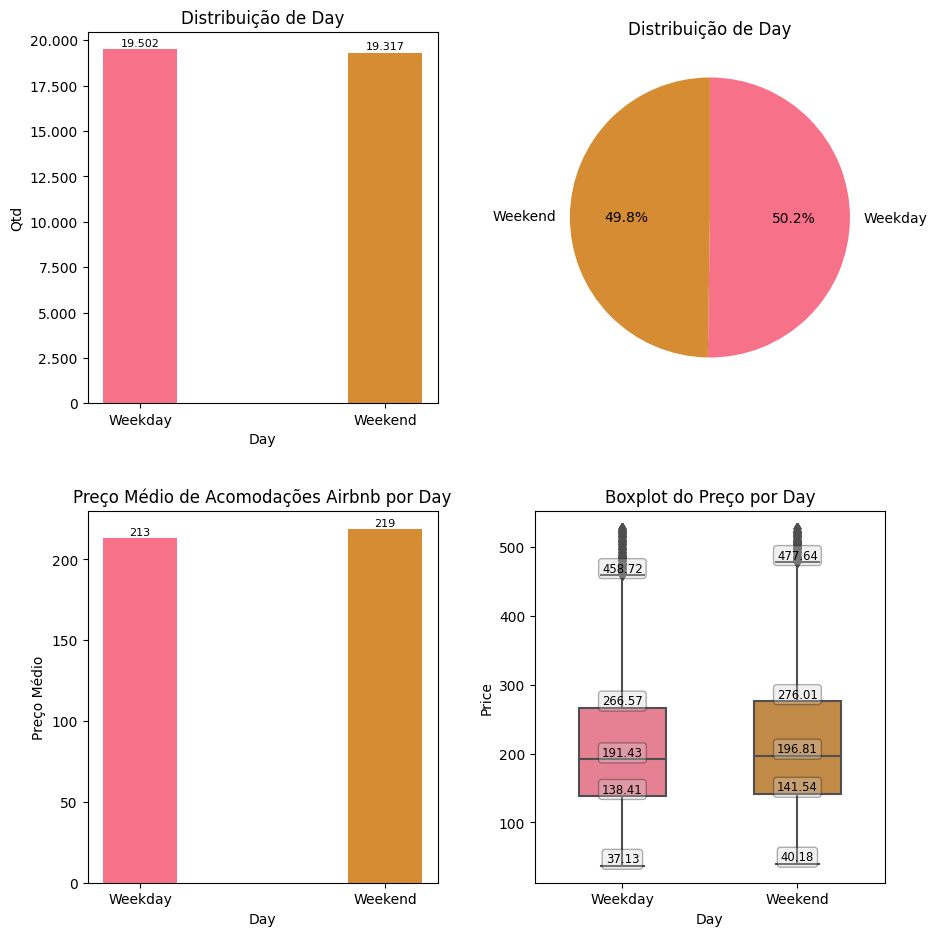

In [270]:
#variável analisada
var = 'Day'

# Dataframe agrupado pela variável analisada com contagem de registros
counts = df_1.groupby(var).size().reset_index(name='Counts').sort_values('Counts', ascending=False)

# Figura com 4 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#### Gráfico 1: Barras com distribuição da variável analisada
axs[0, 0].bar(counts[var],counts['Counts'],color= sns.color_palette("husl", 9), width=0.3)
# titulos
axs[0, 0].set_title(f"Distribuição de {var}")
axs[0, 0].set_xlabel(var)
axs[0, 0].set_ylabel('Qtd')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(counts['Counts']):
    axs[0, 0].text(i, v + 50, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[0, 0].grid(False)

#### Gráfico 2: Pizza com distribuição da variável analisada (valor em %)
axs[0, 1].pie(counts['Counts'],labels=counts[var], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 9), counterclock=False )
axs[0, 1].set_title(f"Distribuição de {var}")


# Dataframe agrupado pela variável analisada com a média do preço
price_mean = df_1.groupby(var)['Price'].mean().reset_index(name='Price_mean').sort_values('Price_mean', ascending=True)


#### Gráfico 3: Barras com preço médio da variável analisada
axs[1, 0].bar(price_mean[var],price_mean['Price_mean'],color= sns.color_palette("husl", 9), width=0.3)
# titulos
axs[1, 0].set_title(f"Preço Médio de Acomodações Airbnb por {var}")
axs[1, 0].set_xlabel(var)
axs[1, 0].set_ylabel('Preço Médio')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(price_mean['Price_mean']):
    axs[1, 0].text(i, v + 0, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[1, 0].grid(False)



#### Gráfico 4: Boxplot do preço da variável analisada
### Datalabels para o Boxplot
# 1. Transpor a variável analisada para colunas  e manter preço nas linhas
transpor = df_1.pivot(columns=var, values='Price')
# 2. Extrair os valores das estatísticas do boxplot para cada variável analisada
transpor_stat = [boxplot_stats(transpor[col].dropna().values)[0] for col in transpor.columns]
# 3. Criar dataframe das estatísticas para cada variável analisada
stats = pd.DataFrame(transpor_stat, index=transpor.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
# 4. ordenar pela média
stats = pd.merge(stats,df_1.groupby(var)['Price'].mean().reset_index(name='mean'),how="inner",on=var).sort_values('mean', ascending=True).drop('mean', axis=1).set_index(var)

# Gráfico
box_plot = sns.boxplot(x=var, y='Price', data=df_1, ax=axs[1, 1], order=df_1.groupby([var])['Price'].mean().sort_values(ascending = True).index, palette= sns.color_palette("husl", 9), width = 0.5)
axs[1, 1].set_title(f"Boxplot do Preço por {var}")

# Inserir os Datalabels do Boxplot
for xtick in box_plot.get_xticks():
    for col in stats.columns:
        box_plot.text(xtick, stats[col][xtick], stats[col][xtick], horizontalalignment='center', verticalalignment='bottom', size='small', color='black', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
# Remover as linhas de grade
axs[1, 1].grid(False)

# espaçamento
fig.tight_layout(pad=3)

plt.show()

A divisão entre dia da semana e fim de semana é praticamente 50%. Quase todas as acomodações tem a opção para estes dois tipos de dia.

Além disso, o dia da semana não apresenta uma grande diferença no preço. Será  avalidada posteriormente a necessidade de utilizar esta variavel no modelo.

>>> 2.3) Tipo de quarto (Room Type)

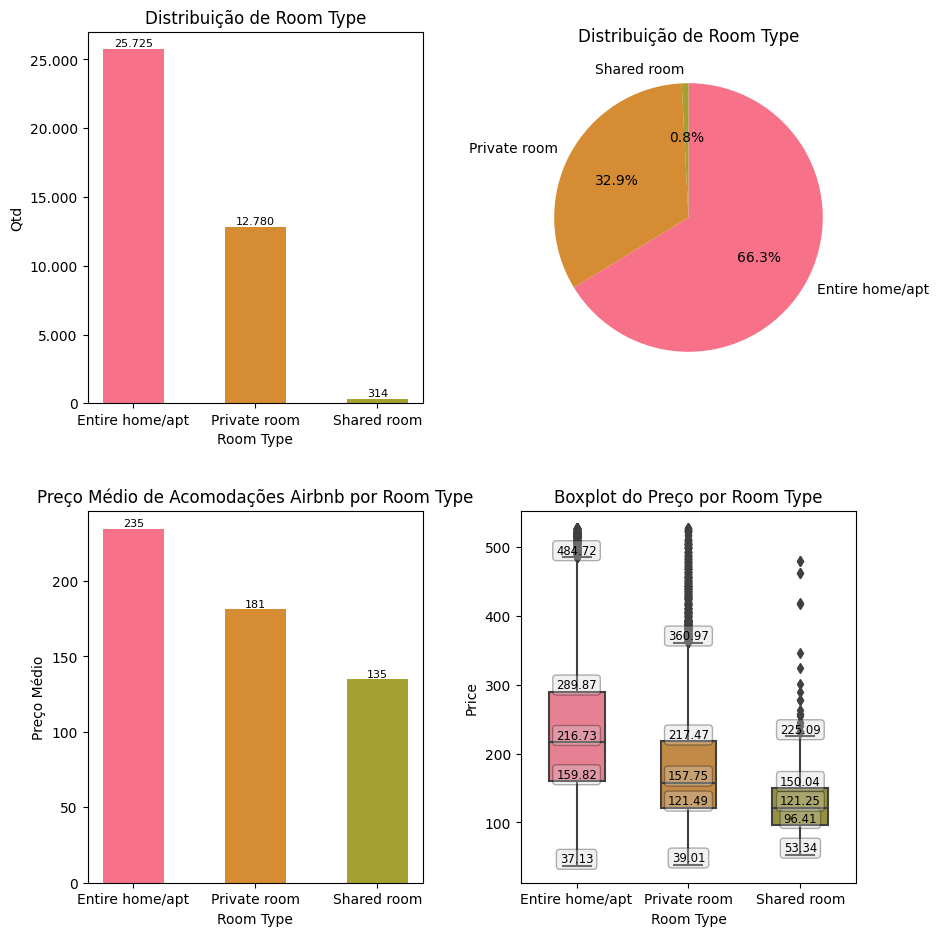

In [271]:
#variável analisada
var = 'Room Type'

# Dataframe agrupado pela variável analisada com contagem de registros
counts = df_1.groupby(var).size().reset_index(name='Counts').sort_values('Counts', ascending=False)

# Figura com 4 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#### Gráfico 1: Barras com distribuição da variável analisada
axs[0, 0].bar(counts[var],counts['Counts'],color= sns.color_palette("husl", 9), width=0.5)
# titulos
axs[0, 0].set_title(f"Distribuição de {var}")
axs[0, 0].set_xlabel(var)
axs[0, 0].set_ylabel('Qtd')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(counts['Counts']):
    axs[0, 0].text(i, v + 50, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[0, 0].grid(False)

#### Gráfico 2: Pizza com distribuição da variável analisada (valor em %)
axs[0, 1].pie(counts['Counts'],labels=counts[var], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 9), counterclock=False )
axs[0, 1].set_title(f"Distribuição de {var}")


# Dataframe agrupado pela variável analisada com a média do preço
price_mean = df_1.groupby(var)['Price'].mean().reset_index(name='Price_mean').sort_values('Price_mean', ascending=False)


#### Gráfico 3: Barras com preço médio da variável analisada
axs[1, 0].bar(price_mean[var],price_mean['Price_mean'],color= sns.color_palette("husl", 9), width=0.5)
# titulos
axs[1, 0].set_title(f"Preço Médio de Acomodações Airbnb por {var}")
axs[1, 0].set_xlabel(var)
axs[1, 0].set_ylabel('Preço Médio')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(price_mean['Price_mean']):
    axs[1, 0].text(i, v + 0, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[1, 0].grid(False)



#### Gráfico 4: Boxplot do preço da variável analisada
### Datalabels para o Boxplot
# 1. Transpor a variável analisada para colunas  e manter preço nas linhas
transpor = df_1.pivot(columns=var, values='Price')
# 2. Extrair os valores das estatísticas do boxplot para cada variável analisada
transpor_stat = [boxplot_stats(transpor[col].dropna().values)[0] for col in transpor.columns]
# 3. Criar dataframe das estatísticas para cada variável analisada
stats = pd.DataFrame(transpor_stat, index=transpor.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
# 4. ordenar pela mediana
stats = pd.merge(stats,df_1.groupby(var)['Price'].median().reset_index(name='median'),how="inner",on=var).sort_values('median', ascending=False).drop('median', axis=1).set_index(var)

# Gráfico
box_plot = sns.boxplot(x=var, y='Price', data=df_1, ax=axs[1, 1], order=df_1.groupby([var])['Price'].median().sort_values(ascending = False).index, palette= sns.color_palette("husl", 9), width = 0.5)
axs[1, 1].set_title(f"Boxplot do Preço por {var}")

# Inserir os Datalabels do Boxplot
for xtick in box_plot.get_xticks():
    for col in stats.columns:
        box_plot.text(xtick, stats[col][xtick], stats[col][xtick], horizontalalignment='center', verticalalignment='bottom', size='small', color='black', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
# Remover as linhas de grade
axs[1, 1].grid(False)

# espaçamento
fig.tight_layout(pad=3)

plt.show()

A maior parte das acomodações é de apartamento inteiro, com aproximadamente 68%. Quarto privativo corresponde à 31%, menos de 1% é de quarto compartilhado.

De acordo com os gráficos 3 e 4, percebe-se que o tipo de quarto influencia no preço da acomodação. Acomodações que não correspondem ao imóvel completo apresentam valor bem abaixo da média. Caso seja um quarto compartilhado, o valor médio chega a ser 37% menor.

In [272]:
#Criar uma matriz contando o cruzamento entre as variáveis 'Shared Room' e 'Private Room'
cross = pd.crosstab(df['Shared Room'], df['Private Room'])
print(cross)
print()
# Printar a contagem distinta de 'Room Type' dentre as 4 combinações possíveis de 'Shared Room' e 'Private Room' para verificar se realmente bate com o esperado a partir da tabela acima.
print(df[(df['Shared Room'] == False) & (df['Private Room'] == False)].groupby('Room Type').size())
print()
print(df[(df['Shared Room'] == False) & (df['Private Room'] == True)].groupby('Room Type').size())
print()
print(df[(df['Shared Room'] == True) & (df['Private Room'] == False)].groupby('Room Type').size())
print()
print(df[(df['Shared Room'] == True) & (df['Private Room'] == True)].groupby('Room Type').size())

Private Room  False  True 
Shared Room               
False         28264  13134
True            316      0

Room Type
Entire home/apt    28264
dtype: int64

Room Type
Private room    13134
dtype: int64

Room Type
Shared room    316
dtype: int64

Series([], dtype: int64)


A combinação das variáveis 'Shared Room' e 'Private Room' traz a mesma informação que a variável Room type.


*   'Shared Room' = 'False' e 'Private Room' = 'False' -> Room Type = 'Entire home/apt'
*   'Shared Room' = 'False' e 'Private Room' = 'True' -> Room Type = 'Private Room'
*   'Shared Room' = 'True' e 'Private Room' = 'False' -> Room Type = 'Shared Room'

>>> 2.4) Superhost (Superhost)

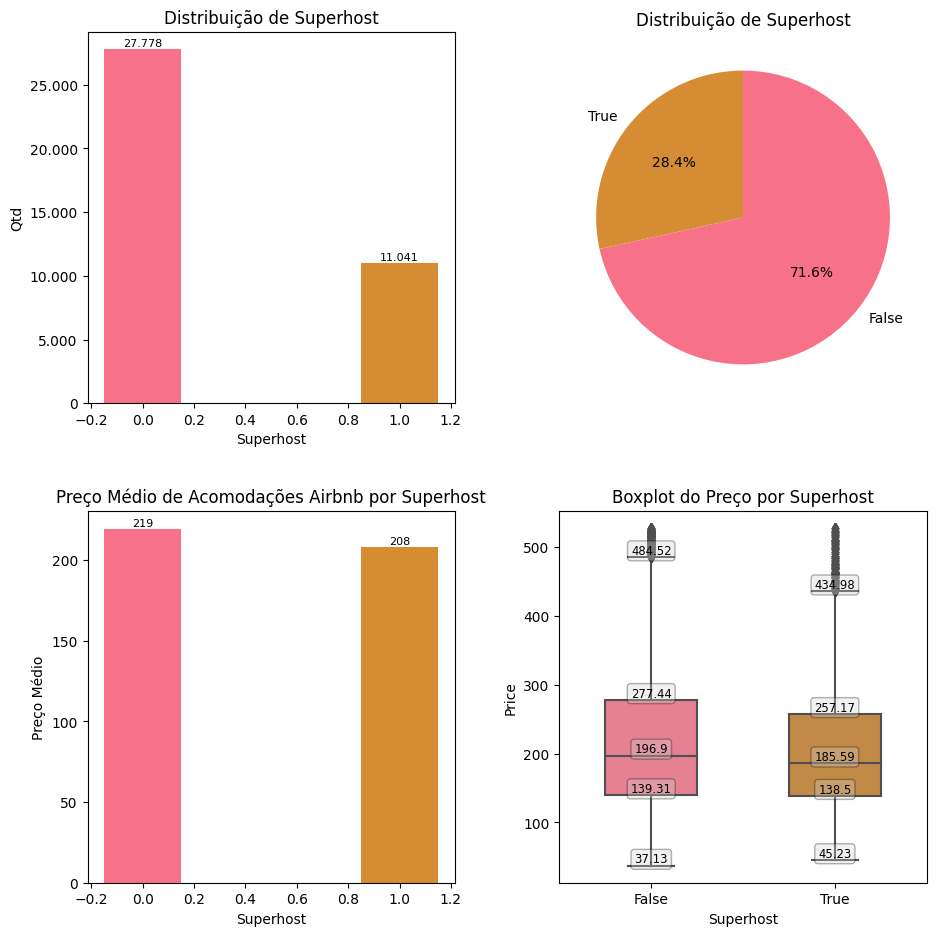

In [273]:
#variável analisada
var = 'Superhost'

# Dataframe agrupado pela variável analisada com contagem de registros
counts = df_1.groupby(var).size().reset_index(name='Counts').sort_values('Counts', ascending=False)

# Figura com 4 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#### Gráfico 1: Barras com distribuição da variável analisada
axs[0, 0].bar(counts[var],counts['Counts'],color= sns.color_palette("husl", 9), width=0.3)
# titulos
axs[0, 0].set_title(f"Distribuição de {var}")
axs[0, 0].set_xlabel(var)
axs[0, 0].set_ylabel('Qtd')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(counts['Counts']):
    axs[0, 0].text(i, v + 50, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[0, 0].grid(False)

#### Gráfico 2: Pizza com distribuição da variável analisada (valor em %)
axs[0, 1].pie(counts['Counts'],labels=counts[var], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 9), counterclock=False )
axs[0, 1].set_title(f"Distribuição de {var}")


# Dataframe agrupado pela variável analisada com a média do preço
price_mean = df_1.groupby(var)['Price'].mean().reset_index(name='Price_mean').sort_values('Price_mean', ascending=False)


#### Gráfico 3: Barras com preço médio da variável analisada
axs[1, 0].bar(price_mean[var],price_mean['Price_mean'],color= sns.color_palette("husl", 9), width=0.3)
# titulos
axs[1, 0].set_title(f"Preço Médio de Acomodações Airbnb por {var}")
axs[1, 0].set_xlabel(var)
axs[1, 0].set_ylabel('Preço Médio')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(price_mean['Price_mean']):
    axs[1, 0].text(i, v + 0, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[1, 0].grid(False)



#### Gráfico 4: Boxplot do preço da variável analisada
### Datalabels para o Boxplot
# 1. Transpor a variável analisada para colunas  e manter preço nas linhas
transpor = df_1.pivot(columns=var, values='Price')
# 2. Extrair os valores das estatísticas do boxplot para cada variável analisada
transpor_stat = [boxplot_stats(transpor[col].dropna().values)[0] for col in transpor.columns]
# 3. Criar dataframe das estatísticas para cada variável analisada
stats = pd.DataFrame(transpor_stat, index=transpor.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
# 4. ordenar pela mediana
stats = pd.merge(stats,df_1.groupby(var)['Price'].median().reset_index(name='median'),how="inner",on=var).sort_values('median', ascending=False).drop('median', axis=1).set_index(var)

# Gráfico
box_plot = sns.boxplot(x=var, y='Price', data=df_1, ax=axs[1, 1], order=df_1.groupby([var])['Price'].median().sort_values(ascending = False).index, palette= sns.color_palette("husl", 9), width = 0.5)
axs[1, 1].set_title(f"Boxplot do Preço por {var}")

# Inserir os Datalabels do Boxplot
for xtick in box_plot.get_xticks():
    for col in stats.columns:
        box_plot.text(xtick, stats[col][xtick], stats[col][xtick], horizontalalignment='center', verticalalignment='bottom', size='small', color='black', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
# Remover as linhas de grade
axs[1, 1].grid(False)

# espaçamento
fig.tight_layout(pad=3)

plt.show()

Aproximadamente 28% das acomodações correspondem a Superhost.

A variável Superhost não apresenta uma grande diferença no preço. Será avaliada posteriormente a necessidade de utilizar esta variavel no modelo.

>>> 2.5) Capacidade de pessoas (Person Capacity)

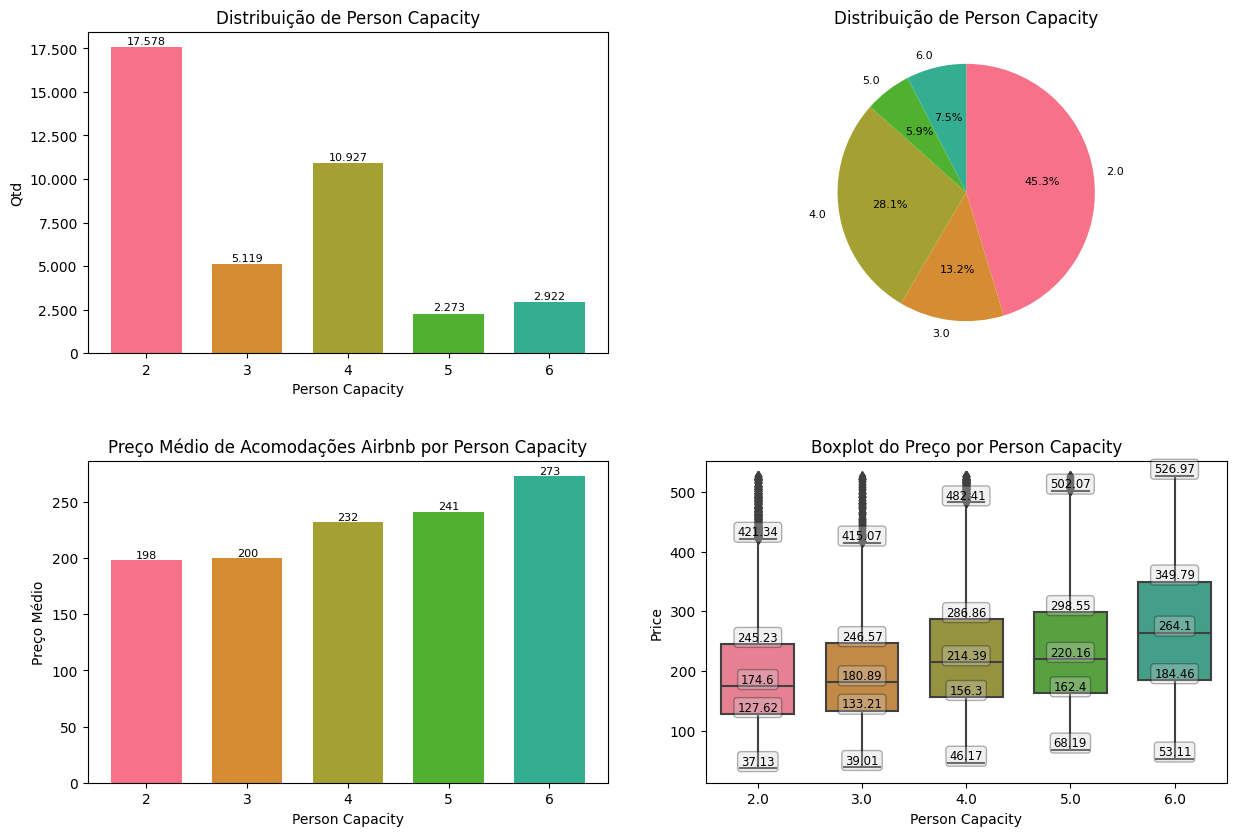

In [274]:
#variável analisada
var = 'Person Capacity'

# Dataframe agrupado pela variável analisada com contagem de registros
counts = df_1.groupby(var).size().reset_index(name='Counts').sort_values(var, ascending=True)

# Figura com 4 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 9))

#### Gráfico 1: Barras com distribuição da variável analisada
axs[0, 0].bar(counts[var],counts['Counts'],color= sns.color_palette("husl", 9), width=0.7)
# titulos
axs[0, 0].set_title(f"Distribuição de {var}")
axs[0, 0].set_xlabel(var)
axs[0, 0].set_ylabel('Qtd')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(counts['Counts']):
    axs[0, 0].text(i+2, v + 50, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[0, 0].grid(False)

#### Gráfico 2: Pizza com distribuição da variável analisada (valor em %)
axs[0, 1].pie(counts['Counts'],labels=counts[var], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 9), counterclock=False, textprops={'fontsize': 8})
axs[0, 1].set_title(f"Distribuição de {var}")


# Dataframe agrupado pela variável analisada com a média do preço
price_mean = df_1.groupby(var)['Price'].mean().reset_index(name='Price_mean').sort_values(var, ascending=True)


#### Gráfico 3: Barras com preço médio da variável analisada
axs[1, 0].bar(price_mean[var],price_mean['Price_mean'],color= sns.color_palette("husl", 9), width=0.7)
# titulos
axs[1, 0].set_title(f"Preço Médio de Acomodações Airbnb por {var}")
axs[1, 0].set_xlabel(var)
axs[1, 0].set_ylabel('Preço Médio')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(price_mean['Price_mean']):
    axs[1, 0].text(i+2, v + 0, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[1, 0].grid(False)



#### Gráfico 4: Boxplot do preço da variável analisada
### Datalabels para o Boxplot
# 1. Transpor a variável analisada para colunas  e manter preço nas linhas
transpor = df_1.pivot(columns=var, values='Price')
# 2. Extrair os valores das estatísticas do boxplot para cada variável analisada
transpor_stat = [boxplot_stats(transpor[col].dropna().values)[0] for col in transpor.columns]
# 3. Criar dataframe das estatísticas para cada variável analisada
stats = pd.DataFrame(transpor_stat, index=transpor.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)

# Gráfico
box_plot = sns.boxplot(x=var, y='Price', data=df_1, ax=axs[1, 1], palette= sns.color_palette("husl", 9), width = 0.7)
axs[1, 1].set_title(f"Boxplot do Preço por {var}")

# Inserir os Datalabels do Boxplot
for xtick in box_plot.get_xticks()+2:
    for col in stats.columns:
        box_plot.text(xtick-2, stats[col][xtick], stats[col][xtick], horizontalalignment='center', verticalalignment='bottom', size='small', color='black', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
# Remover as linhas de grade
axs[1, 1].grid(False)

# espaçamento
fig.tight_layout(pad=3)

plt.show()

A análise dos dois primeiros gráficos acima indica que acomodações de duas pessoas são a maioria, com 45%. Também testaca-se acomodações de quatro pessoas com 28% dos imoveis.

Além disso, conforme os dois últimos gráficos ilustram, percebe-se que 
tanto a média quanto a mediana do preço aumenta conforme aumenta a capacidade de indivíduos.

>>> 2.6) Multiplos quartos (Multiple Rooms)

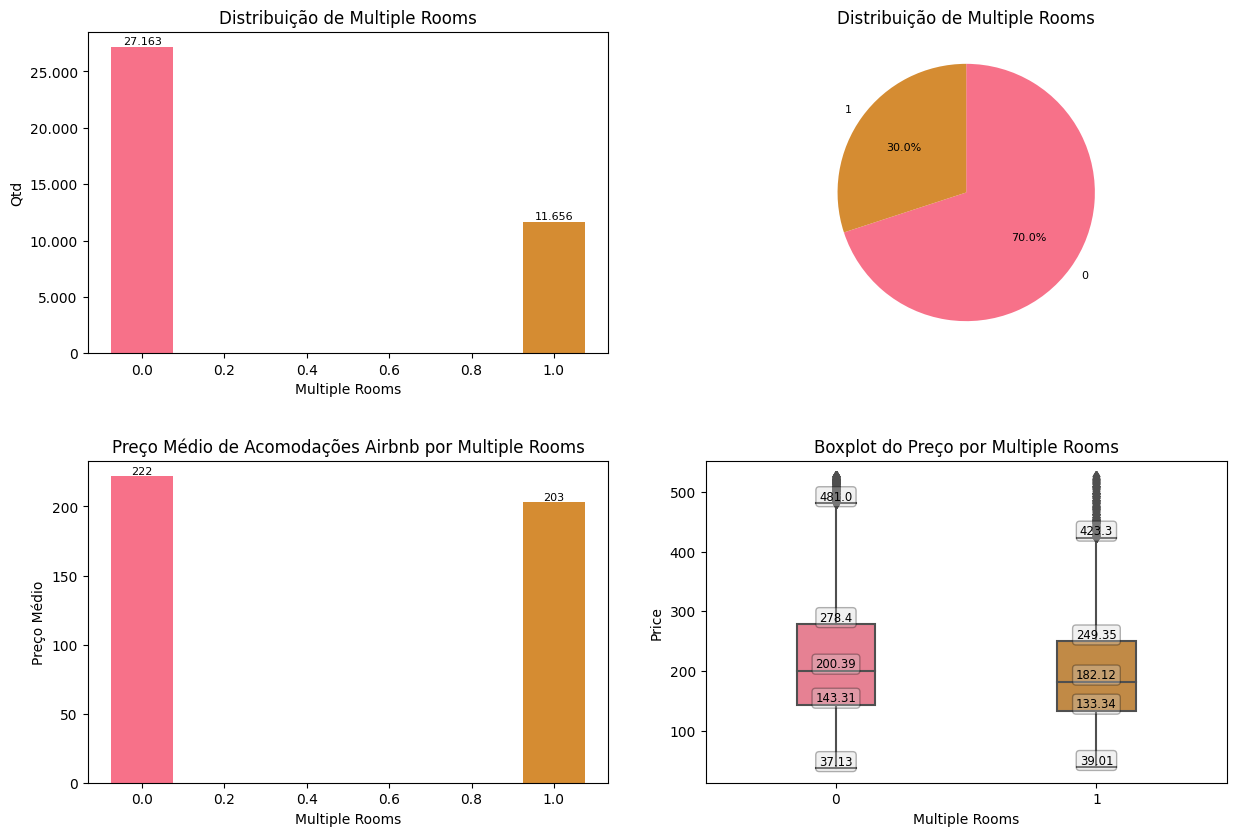

In [275]:
#variável analisada
var = 'Multiple Rooms'

# Dataframe agrupado pela variável analisada com contagem de registros
counts = df_1.groupby(var).size().reset_index(name='Counts').sort_values(var, ascending=True)

# Figura com 4 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 9))

#### Gráfico 1: Barras com distribuição da variável analisada
axs[0, 0].bar(counts[var],counts['Counts'],color= sns.color_palette("husl", 9), width=0.15)
# titulos
axs[0, 0].set_title(f"Distribuição de {var}")
axs[0, 0].set_xlabel(var)
axs[0, 0].set_ylabel('Qtd')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(counts['Counts']):
    axs[0, 0].text(i, v + 50, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[0, 0].grid(False)

#### Gráfico 2: Pizza com distribuição da variável analisada (valor em %)
axs[0, 1].pie(counts['Counts'],labels=counts[var], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 9), counterclock=False, textprops={'fontsize': 8})
axs[0, 1].set_title(f"Distribuição de {var}")


# Dataframe agrupado pela variável analisada com a média do preço
price_mean = df_1.groupby(var)['Price'].mean().reset_index(name='Price_mean').sort_values(var, ascending=True)


#### Gráfico 3: Barras com preço médio da variável analisada
axs[1, 0].bar(price_mean[var],price_mean['Price_mean'],color= sns.color_palette("husl", 9), width=0.15)
# titulos
axs[1, 0].set_title(f"Preço Médio de Acomodações Airbnb por {var}")
axs[1, 0].set_xlabel(var)
axs[1, 0].set_ylabel('Preço Médio')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(price_mean['Price_mean']):
    axs[1, 0].text(i, v + 0, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[1, 0].grid(False)



#### Gráfico 4: Boxplot do preço da variável analisada
### Datalabels para o Boxplot
# 1. Transpor a variável analisada para colunas  e manter preço nas linhas
transpor = df_1.pivot(columns=var, values='Price')
# 2. Extrair os valores das estatísticas do boxplot para cada variável analisada
transpor_stat = [boxplot_stats(transpor[col].dropna().values)[0] for col in transpor.columns]
# 3. Criar dataframe das estatísticas para cada variável analisada
stats = pd.DataFrame(transpor_stat, index=transpor.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)

# Gráfico
box_plot = sns.boxplot(x=var, y='Price', data=df_1, ax=axs[1, 1], palette= sns.color_palette("husl", 9), width = 0.3)
axs[1, 1].set_title(f"Boxplot do Preço por {var}")

# Inserir os Datalabels do Boxplot
for xtick in box_plot.get_xticks():
    for col in stats.columns:
        box_plot.text(xtick, stats[col][xtick], stats[col][xtick], horizontalalignment='center', verticalalignment='bottom', size='small', color='black', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
# Remover as linhas de grade
axs[1, 1].grid(False)

# espaçamento
fig.tight_layout(pad=3)

plt.show()

70% das acomodações não possuem quartos múltiplos.

Além disso, percebe-se que estas acomodações sem quartos múltiplos apresentam preço médio ligeiramente maior.

>>> 2.7) Business (Business)

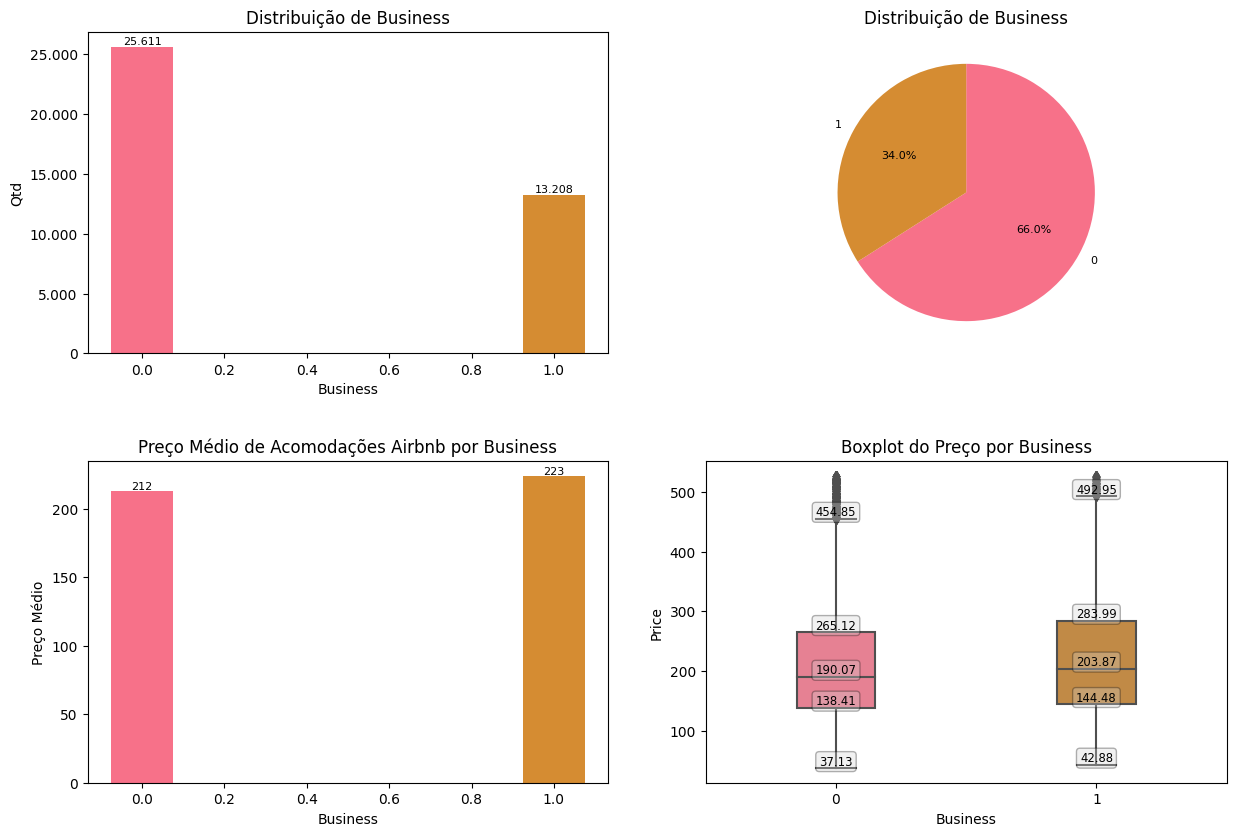

In [276]:
#variável analisada
var = 'Business'

# Dataframe agrupado pela variável analisada com contagem de registros
counts = df_1.groupby(var).size().reset_index(name='Counts').sort_values(var, ascending=True)

# Figura com 4 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 9))

#### Gráfico 1: Barras com distribuição da variável analisada
axs[0, 0].bar(counts[var],counts['Counts'],color= sns.color_palette("husl", 9), width=0.15)
# titulos
axs[0, 0].set_title(f"Distribuição de {var}")
axs[0, 0].set_xlabel(var)
axs[0, 0].set_ylabel('Qtd')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(counts['Counts']):
    axs[0, 0].text(i, v + 50, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[0, 0].grid(False)

#### Gráfico 2: Pizza com distribuição da variável analisada (valor em %)
axs[0, 1].pie(counts['Counts'],labels=counts[var], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 9), counterclock=False, textprops={'fontsize': 8})
axs[0, 1].set_title(f"Distribuição de {var}")


# Dataframe agrupado pela variável analisada com a média do preço
price_mean = df_1.groupby(var)['Price'].mean().reset_index(name='Price_mean').sort_values(var, ascending=True)


#### Gráfico 3: Barras com preço médio da variável analisada
axs[1, 0].bar(price_mean[var],price_mean['Price_mean'],color= sns.color_palette("husl", 9), width=0.15)
# titulos
axs[1, 0].set_title(f"Preço Médio de Acomodações Airbnb por {var}")
axs[1, 0].set_xlabel(var)
axs[1, 0].set_ylabel('Preço Médio')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(price_mean['Price_mean']):
    axs[1, 0].text(i, v + 0, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[1, 0].grid(False)



#### Gráfico 4: Boxplot do preço da variável analisada
### Datalabels para o Boxplot
# 1. Transpor a variável analisada para colunas  e manter preço nas linhas
transpor = df_1.pivot(columns=var, values='Price')
# 2. Extrair os valores das estatísticas do boxplot para cada variável analisada
transpor_stat = [boxplot_stats(transpor[col].dropna().values)[0] for col in transpor.columns]
# 3. Criar dataframe das estatísticas para cada variável analisada
stats = pd.DataFrame(transpor_stat, index=transpor.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)

# Gráfico
box_plot = sns.boxplot(x=var, y='Price', data=df_1, ax=axs[1, 1], palette= sns.color_palette("husl", 9), width = 0.3)
axs[1, 1].set_title(f"Boxplot do Preço por {var}")

# Inserir os Datalabels do Boxplot
for xtick in box_plot.get_xticks():
    for col in stats.columns:
        box_plot.text(xtick, stats[col][xtick], stats[col][xtick], horizontalalignment='center', verticalalignment='bottom', size='small', color='black', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
# Remover as linhas de grade
axs[1, 1].grid(False)

# espaçamento
fig.tight_layout(pad=3)

plt.show()

66% das acomodações são de Business (anfitrião possui mais de 4 ofertas).

Há pouca diferença na média de preços. Acomodações Business tem a média apenas 5% maior.

>>> 2.8) Nº de quartos (Bedrooms)

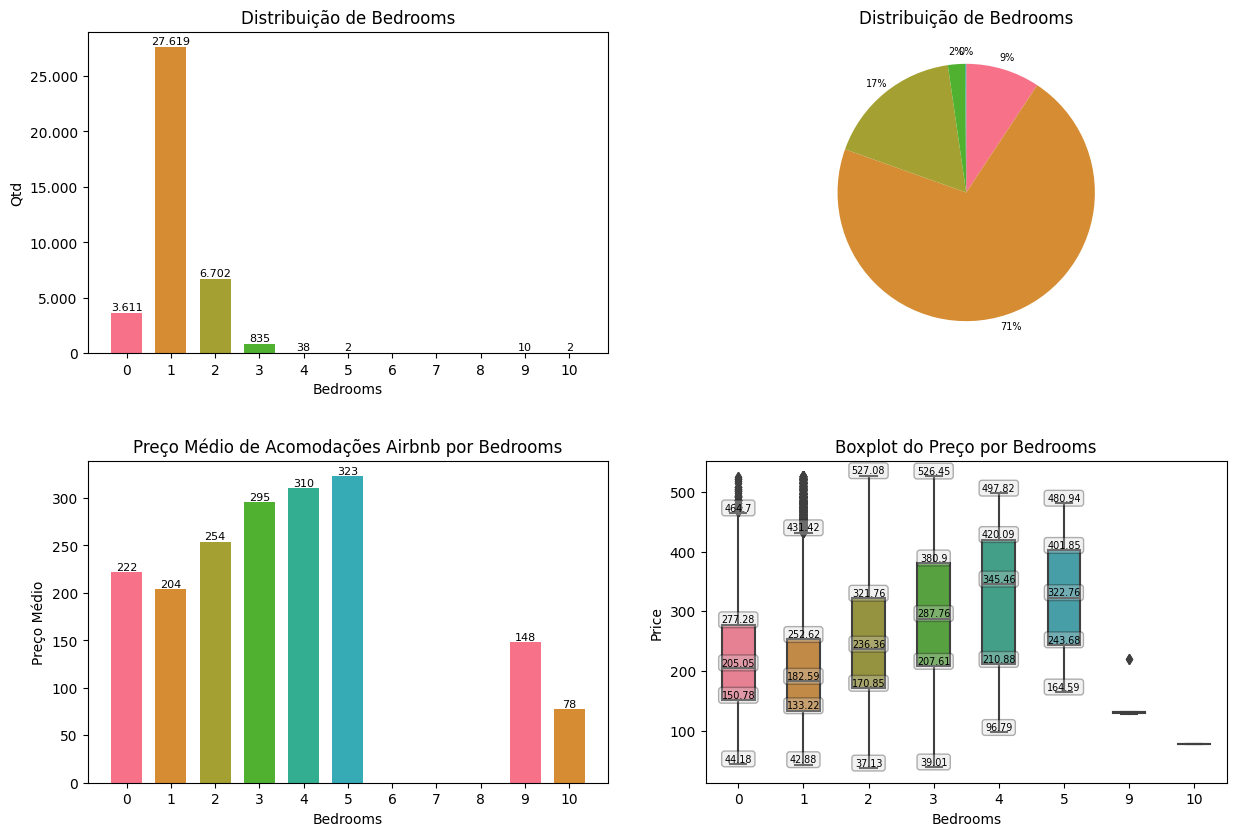

In [277]:

#variável analisada
var = 'Bedrooms'

# Dataframe agrupado pela variável analisada com contagem de registros
counts = df_1.groupby(var).size().reset_index(name='Counts').sort_values(var, ascending=True)
# inserir numeros faltantes para acertar o posicionamento dos valores
counts = pd.concat([counts, pd.DataFrame({var: [6, 7, 8], 'Counts':[0,0,0]}, index=[5.1, 5.2, 5.3])]).sort_index()

# Figura com 4 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 9))

#### Gráfico 1: Barras com distribuição da variável analisada
axs[0, 0].bar(counts[var],counts['Counts'],color= sns.color_palette("husl", 9), width=0.7)
# titulos
axs[0, 0].set_title(f"Distribuição de {var}")
axs[0, 0].set_xlabel(var)
axs[0, 0].set_ylabel('Qtd')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))

# adicionar valores(y) acima das barras
for i, v in enumerate(counts['Counts'].replace(0, np.nan)):
    axs[0, 0].text(i, v + 50, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[0, 0].grid(False)
# Marcar cada número no eixo X
axs[0, 0].set_xticks(np.arange(0, 11, step=1))


#### Gráfico 2: Pizza com distribuição da variável analisada (valor em %)

#agrupar 4+ quartos
counts_pie = pd.DataFrame(pd.merge(counts,pd.DataFrame({var: [0,1,2,3,4,5,6,7,8,9,10], 'group':['0','1','2','3','4+','4+','4+','4+','4+','4+','4+']}),how="left",on=var).groupby('group')['Counts'].sum())

axs[0, 1].pie(counts_pie['Counts'], autopct='%1.f%%', startangle=90, colors=sns.color_palette("husl", 9), counterclock=False, textprops={'fontsize': 7}, pctdistance=1.1)
axs[0, 1].set_title(f"Distribuição de {var}")

 

# Dataframe agrupado pela variável analisada com a média do preço
price_mean = df_1.groupby(var)['Price'].mean().reset_index(name='Price_mean').sort_values(var, ascending=True)
# inserir numeros faltantes para acertar o posicionamento dos valores
price_mean = pd.concat([price_mean, pd.DataFrame({var: [6, 7, 8], 'Price_mean':[0,0,0]}, index=[5.1, 5.2, 5.3]).replace(0, np.nan)]).sort_index()


#### Gráfico 3: Barras com preço médio da variável analisada
axs[1, 0].bar(price_mean[var],price_mean['Price_mean'],color= sns.color_palette("husl", 9), width=0.7)
# titulos
axs[1, 0].set_title(f"Preço Médio de Acomodações Airbnb por {var}")
axs[1, 0].set_xlabel(var)
axs[1, 0].set_ylabel('Preço Médio')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(price_mean['Price_mean']):
    axs[1, 0].text(i, v + 0, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[1, 0].grid(False)
# Marcar cada número no eixo X
axs[1, 0].set_xticks(np.arange(0, 11, step=1))

#### Gráfico 4: Boxplot do preço da variável analisada
### Datalabels para o Boxplot
# 1. Transpor a variável analisada para colunas  e manter preço nas linhas
transpor = df_1.pivot(columns=var, values='Price')
# 2. Extrair os valores das estatísticas do boxplot para cada variável analisada
transpor_stat = [boxplot_stats(transpor[col].dropna().values)[0] for col in transpor.columns]
# 3. Criar dataframe das estatísticas para cada variável analisada
stats = pd.DataFrame(transpor_stat, index=transpor.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)

# inserir numeros faltantes para acertar o posicionamento dos valores
empty = pd.DataFrame(index=[6, 7, 8], columns=[ 'whishi', 'whislo', 'q1', 'med', 'q3'])
empty.index.name = var
stats = pd.concat([stats, empty]).sort_index()

# Gráfico
box_plot = sns.boxplot(x=var, y='Price', data=df_1, ax=axs[1, 1], palette= sns.color_palette("husl", 9), width = 0.5)
axs[1, 1].set_title(f"Boxplot do Preço por {var}")

# Inserir os Datalabels do Boxplot
for xtick in box_plot.get_xticks():
    for col in stats.columns:
        box_plot.text(xtick, stats[col][xtick], stats[col][xtick], horizontalalignment='center', verticalalignment='bottom', size='x-small', color='black', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
# Remover as linhas de grade
axs[1, 1].grid(False)


# espaçamento
fig.tight_layout(pad=3)

plt.show()


Destaca-se que 71% das acomodações possue apenas 1 quarto. Além disso, quase 98% delas possuem 0, 1 ou 2 quartos.

Ao observar a relação entre o número de quartos e o preço, percebe-se que não se trata de uma correlação linear. A média para 1 quarto é 8% menor do que para 0 quartos. De 1 quarto até 5 quartos a média passa a subir consecutivamente. Contudo, a média cai com 9 quartos e cai novamente para 10 quartos.

Para captar este efeito no modelo faremos uma variável binária (0 ou 1) para cada possibilidade de nº de quartos (one-hot encoding).

>>> 2.9) Nota de Limpeza (Cleanliness Rating)

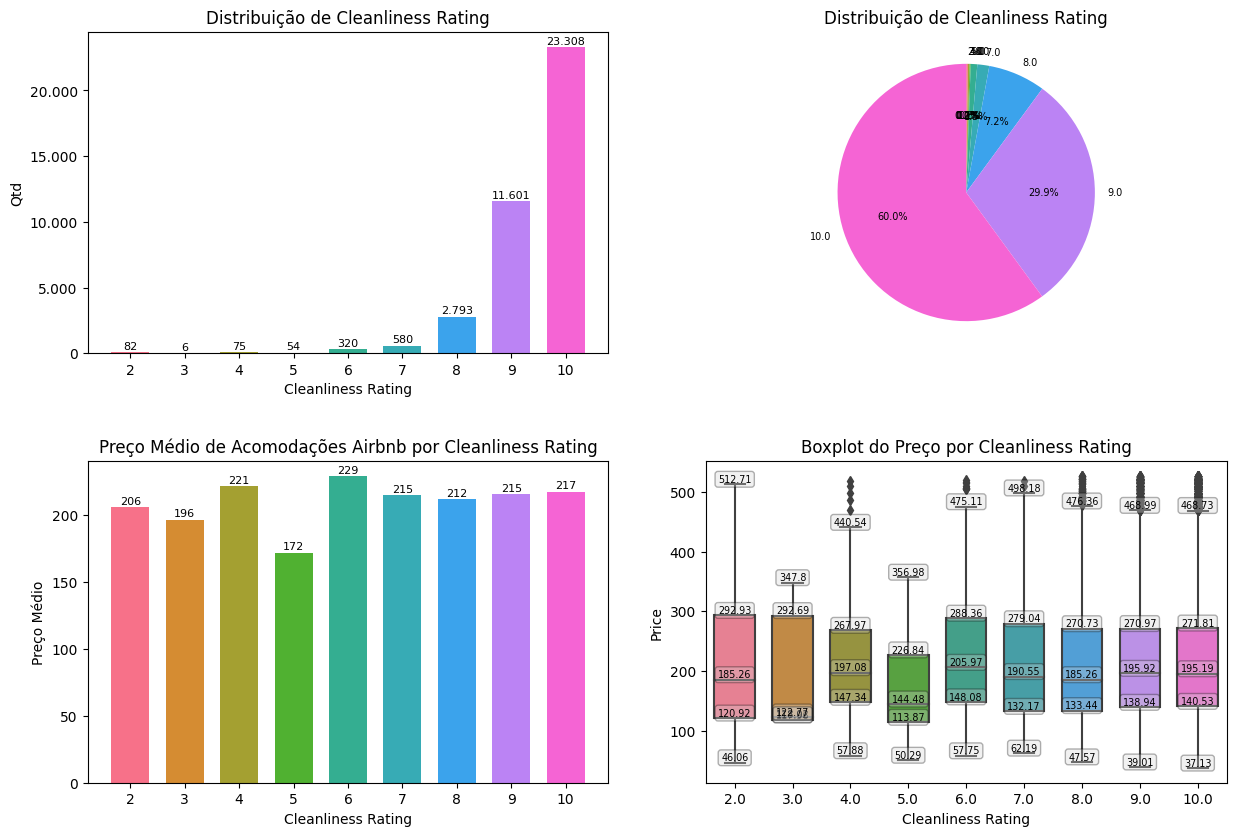

In [278]:
#variável analisada
var = 'Cleanliness Rating'

# Dataframe agrupado pela variável analisada com contagem de registros
counts = df_1.groupby(var).size().reset_index(name='Counts').sort_values(var, ascending=True)

# Figura com 4 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 9))

#### Gráfico 1: Barras com distribuição da variável analisada
axs[0, 0].bar(counts[var],counts['Counts'],color= sns.color_palette("husl", 9), width=0.7)
# titulos
axs[0, 0].set_title(f"Distribuição de {var}")
axs[0, 0].set_xlabel(var)
axs[0, 0].set_ylabel('Qtd')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(counts['Counts']):
    axs[0, 0].text(i+2, v + 70, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[0, 0].grid(False)
# Marcar cada número no eixo X
axs[0, 0].set_xticks(np.arange(2, 11, step=1))

#### Gráfico 2: Pizza com distribuição da variável analisada (valor em %)
axs[0, 1].pie(counts['Counts'],labels=counts[var], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 9), counterclock=False, textprops={'fontsize': 7})
axs[0, 1].set_title(f"Distribuição de {var}")


# Dataframe agrupado pela variável analisada com a média do preço
price_mean = df_1.groupby(var)['Price'].mean().reset_index(name='Price_mean').sort_values(var, ascending=True)


#### Gráfico 3: Barras com preço médio da variável analisada
axs[1, 0].bar(price_mean[var],price_mean['Price_mean'],color= sns.color_palette("husl", 9), width=0.7)
# titulos
axs[1, 0].set_title(f"Preço Médio de Acomodações Airbnb por {var}")
axs[1, 0].set_xlabel(var)
axs[1, 0].set_ylabel('Preço Médio')
# trocar o separador dos milhares ',' por '.' no eixo y
axs[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y).replace(',', '.')))
# adicionar valores(y) acima das barras
for i, v in enumerate(price_mean['Price_mean']):
    axs[1, 0].text(i+2, v + 1, '{:,.0f}'.format(v).replace(',', '.'), color='black', ha='center', va='bottom', fontsize = 8)
# Remover as linhas de grade
axs[1, 0].grid(False)
# Marcar cada número no eixo X
axs[1, 0].set_xticks(np.arange(2, 11, step=1))



#### Gráfico 4: Boxplot do preço da variável analisada
### Datalabels para o Boxplot
# 1. Transpor a variável analisada para colunas  e manter preço nas linhas
transpor = df_1.pivot(columns=var, values='Price')
# 2. Extrair os valores das estatísticas do boxplot para cada variável analisada
transpor_stat = [boxplot_stats(transpor[col].dropna().values)[0] for col in transpor.columns]
# 3. Criar dataframe das estatísticas para cada variável analisada
stats = pd.DataFrame(transpor_stat, index=transpor.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)

# Gráfico
box_plot = sns.boxplot(x=var, y='Price', data=df_1, ax=axs[1, 1], palette= sns.color_palette("husl", 9), width = 0.7)
axs[1, 1].set_title(f"Boxplot do Preço por {var}")

# Inserir os Datalabels do Boxplot
for xtick in box_plot.get_xticks()+2:
    for col in stats.columns:
        box_plot.text(xtick-2, stats[col][xtick], stats[col][xtick], horizontalalignment='center', verticalalignment='bottom', size='x-small', color='black', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
# Remover as linhas de grade
axs[1, 1].grid(False)

# espaçamento
fig.tight_layout(pad=3)

plt.show()

Mais de 97% das acomodações possuem nota de limpeza maior ou igual à 8.

Ao observar os dois gráficos da segunda linha, percebe-se que não há uma correlação clara entre nota de limpeza e o preço.

>> 3) Análise das Variáveis Quantitativas


In [279]:
# selecionar as variáveis quantitativas
df_1_quant = df_1.loc[:, ['Price', 'Guest Satisfaction', 'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Restraunt Index']]

In [280]:
df_1_quant.head(10)

,Price,Guest Satisfaction,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index
0,194.033698,93.0,5.022964,2.539380,78.690379,98.253896
1,344.245776,85.0,0.488389,0.239404,631.176378,837.280757
2,264.101422,87.0,5.748312,3.651621,75.275877,95.386955
3,433.529398,90.0,0.384862,0.439876,493.272534,875.033098
4,485.552926,98.0,0.544738,0.318693,552.830324,815.305740
5,215.124317,94.0,1.881092,0.729747,200.167652,242.765524
6,276.521454,88.0,3.142361,0.924404,206.252862,238.291258
7,319.640053,97.0,2.182707,1.590381,191.501339,229.297401
8,209.031472,96.0,7.304535,3.720814,59.776181,75.701057
9,368.851499,98.0,1.031101,0.557885,359.921932,439.950562


>>> 3.1) Satisfação do Cliente (Guest Satisfaction)

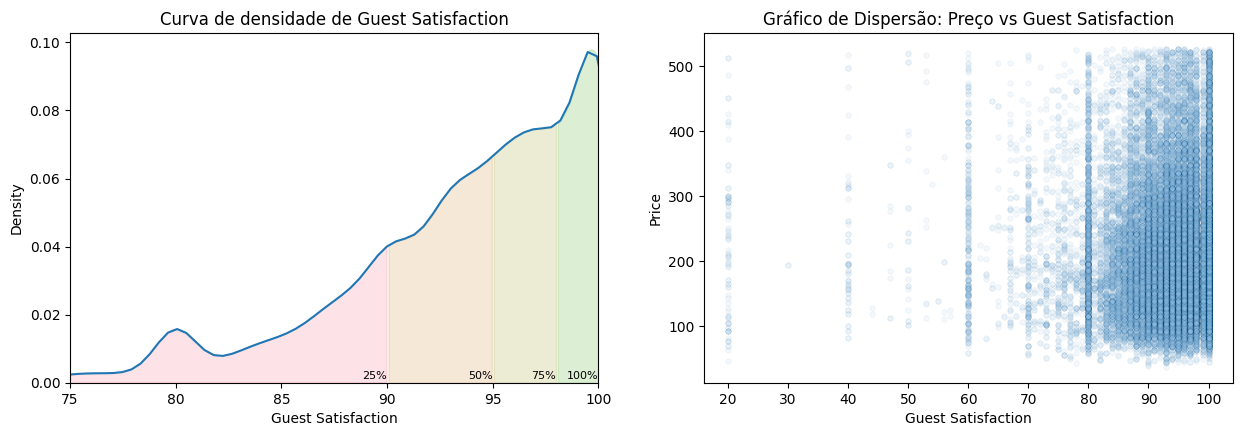


A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)



count    38819.000000
mean        93.063629
std          8.125197
min         20.000000
25%         90.000000
50%         95.000000
75%         98.000000
max        100.000000
Name: Guest Satisfaction, dtype: float64

In [281]:
#variável analisada
var = 'Guest Satisfaction'

# Selecionar a coluna da variável
data = df_1_quant[var]

# Figura com 2 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

#### Gráfico 1: Curva de densidade da variável analisada
sns.kdeplot(data, fill=False, ax=axs[0, 0])
# titulo
axs[0, 0].set_title(f"Curva de densidade de {var}")
# Calcular os quartis
q = np.arange(0, 101, 25)
q_values = np.percentile(data, q)
# Calcular a curva de densidade usando a gaussian_kde
density_curve = gaussian_kde(data)
# Definir os valores de x e y para preencher a aéra abaixo da curva
x = np.linspace(min(data), max(data), 1000)
y = density_curve(x)
# cores
colors=sns.color_palette("husl", 9)
# Adicionar a área e os rótulos abaixo da curva de densidade
for i in range(len(q)-1):
  axs[0, 0].fill_between(x, 0, y, where=((x >= q_values[i]) & (x <= q_values[i+1])), alpha=0.2, color=colors[i])
  # Remover o "0%" no começo
  if i > 0:
    axs[0, 0].text(q_values[i], 0.001, f"{q[i]}%", ha='right', fontsize=8)
# Adicionar o 100% no final
axs[0, 0].text(max(data), 0.001, '100%', ha='right', fontsize=8)
# limite max e min de x
axs[0, 0].set_xlim(right=max(data), left=75)

#### Gráfico 2: Gráfico de Dispersão entre a variável analisada e o Preço
sns.scatterplot(data=df_1_quant, x='Guest Satisfaction', y="Price", s=15, color='#94c2ea', edgecolor='#024a77', linewidth=0.3, alpha=0.1, ax=axs[0, 1])
# titulo
axs[0, 1].set_title(f"Gráfico de Dispersão: Preço vs {var}")

# Deixar somente 2 gráficos
axs[1, 0].remove()
axs[1, 1].remove()
plt.show()




# Teste de Normalidade do Preço
k2, p  = stt.normaltest(df_1_quant[var])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
print()
if p < 0.05:
    print("A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)")
else:
    print("A hipótese nula não pode ser rejeitada (Segue distribuição Normal)")

# Estatísticas descritivas
print()
df_1_quant[var].describe()

A análise do teste de normalidade e do gráfico 1 mostra que a varável não apresenta uma distribuição normal. Nota-se que a satisfação dos clientes está distribuida de forma crescente com 75% das observações com nota de 90 a 100 e 50% somente entre 95 e 100.

Além disso, o gráfico de dispersão entre a variavel o preço mostra que não parece haver correlação entre elas. Diversas acomodações com notas equivalentes apresentam diferentes níveis de preços, formando linhas verticais no gráfico de dispersão.


>>> 3.2) Distância do centro (City Center (km))

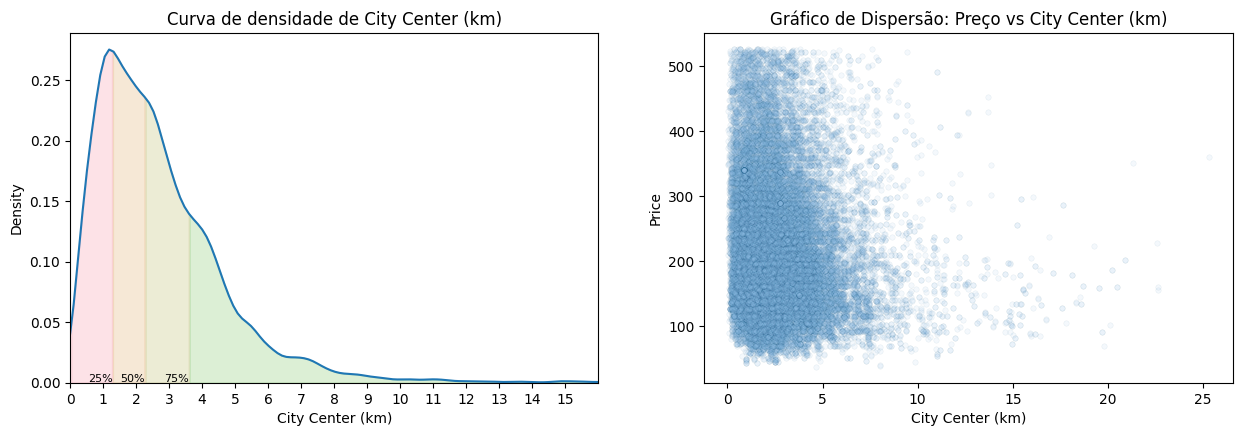


A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)


% com menos de 4km
80.00%


In [282]:
#variável analisada
var = 'City Center (km)'

# Selecionar a coluna da variável
data = df_1_quant[var]

# Figura com 2 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

#### Gráfico 1: Curva de densidade da variável analisada
sns.kdeplot(data, fill=False, ax=axs[0, 0])
# titulos
axs[0, 0].set_title(f"Curva de densidade de {var}")
# Calcular os quartis
q = np.arange(0, 101, 25)
q_values = np.percentile(data, q)
# Calcular a curva de densidade usando a gaussian_kde
density_curve = gaussian_kde(data)
# Definir os valores de x e y para preencher a aéra abaixo da curva
x = np.linspace(min(data), max(data), 1000)
y = density_curve(x)
# cores
colors=sns.color_palette("husl", 9)
# Adicionar a área e os rótulos abaixo da curva de densidade
for i in range(len(q)-1):
  axs[0, 0].fill_between(x, 0, y, where=((x >= q_values[i]) & (x <= q_values[i+1])), alpha=0.2, color=colors[i])
  # Remover o "0%" no começo
  if i > 0:
    axs[0, 0].text(q_values[i], 0.001, f"{q[i]}%", ha='right', fontsize=8)
# Adicionar o 100% no final
axs[0, 0].text(max(data), 0.001, '100%', ha='right', fontsize=8)
# limite max e min de x
axs[0, 0].set_xlim(right=16, left=0)
# Marcar cada número no eixo X
axs[0, 0].set_xticks(np.arange(0, 16, step=1))

#### Gráfico 2: Gráfico de Dispersão entre a variável analisada e o Preço
sns.scatterplot(data=df_1_quant, x=var, y="Price", s=15, color='#94c2ea', edgecolor='#024a77', linewidth=0.3, alpha=0.1, ax=axs[0, 1])
# titulo
axs[0, 1].set_title(f"Gráfico de Dispersão: Preço vs {var}")

# Deixar somente 2 gráficos
axs[1, 0].remove()
axs[1, 1].remove()
plt.show()



# Teste de Normalidade do Preço
k2, p  = stt.normaltest(df_1_quant[var])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
print()
if p < 0.05:
    print("A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)")
else:
    print("A hipótese nula não pode ser rejeitada (Segue distribuição Normal)")

# Estatísticas descritivas
print()
df_1_quant[var].describe()

# percentual dos das acomodações a menos de 4km
print()
print('% com menos de 4km') 
print("{:.2%}".format(round((df_1_quant[df_1_quant[var] < 4].count()/df_1_quant.count()).values[0],2)))


A análise do teste de normalidade e do gráfico 1 mostra que a varável não apresenta uma distribuição normal. Com o gráfico de desidade, percebe-se que a variável aparenta apresentar uma distribuição Assimétrica à Direita. 
Destaca-se que em trono de 80% das acomodações encontram-se a menos de 4km do centro.

Além disso, o gráfico de dispersão entre a variavel o preço mostra que não parece haver correlação entre elas. Diversas acomodações com distâncias equivalentes apresentam diferentes níveis de preços, formando linhas verticais no gráfico de dispersão.

>>> 3.3) Distância do metrô (Metro Distance (km))

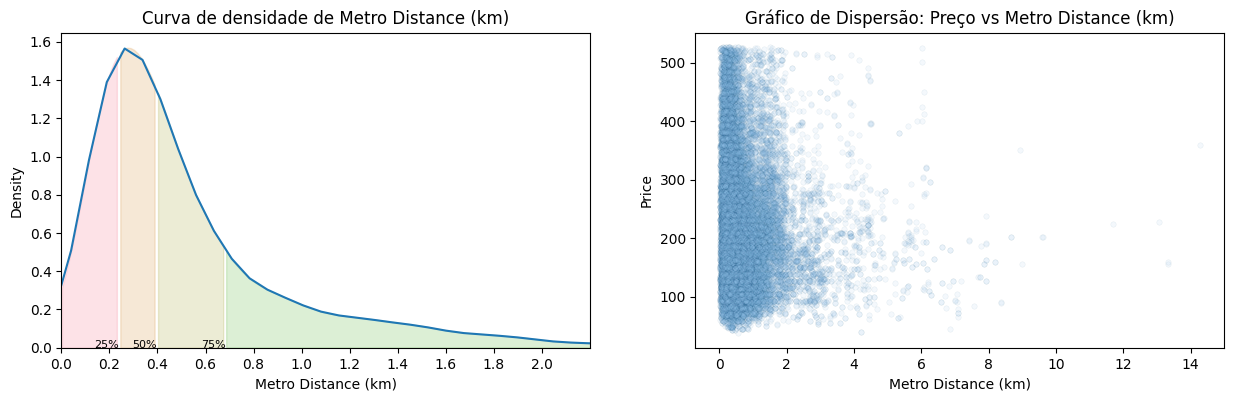


A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)

count    38819.000000
mean         0.610273
std          0.715094
min          0.002301
25%          0.241227
50%          0.396649
75%          0.683034
max         14.273577
Name: Metro Distance (km), dtype: float64

% com menos de 1km
85.00%


In [283]:
#variável analisada
var = 'Metro Distance (km)'

# Selecionar a coluna da variável
data = df_1_quant[var]

# Figura com 2 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

#### Gráfico 1: Curva de densidade da variável analisada
sns.kdeplot(data, fill=False, ax=axs[0, 0])
# titulos
axs[0, 0].set_title(f"Curva de densidade de {var}")
# Calcular os quartis
q = np.arange(0, 101, 25)
q_values = np.percentile(data, q)
# Calcular a curva de densidade usando a gaussian_kde
density_curve = gaussian_kde(data)
# Definir os valores de x e y para preencher a aéra abaixo da curva
x = np.linspace(min(data), max(data), 1000)
y = density_curve(x)
# cores
colors=sns.color_palette("husl", 9)
# Adicionar a área e os rótulos abaixo da curva de densidade
for i in range(len(q)-1):
  axs[0, 0].fill_between(x, 0, y, where=((x >= q_values[i]) & (x <= q_values[i+1])), alpha=0.2, color=colors[i])
  # Remover o "0%" no começo
  if i > 0:
    axs[0, 0].text(q_values[i], 0.001, f"{q[i]}%", ha='right', fontsize=8)

# limite max e min de x
axs[0, 0].set_xlim(right=2.2, left=0)
# Marcar cada número no eixo X
axs[0, 0].set_xticks(np.arange(0, 2.2, step=0.2))

#### Gráfico 2: Gráfico de Dispersão entre a variável analisada e o Preço
sns.scatterplot(data=df_1_quant, x=var, y="Price", s=15, color='#94c2ea', edgecolor='#024a77', linewidth=0.3, alpha=0.1, ax=axs[0, 1])
# titulo
axs[0, 1].set_title(f"Gráfico de Dispersão: Preço vs {var}")

# Deixar somente 2 gráficos
axs[1, 0].remove()
axs[1, 1].remove()
plt.show()



# Teste de Normalidade do Preço
k2, p  = stt.normaltest(df_1_quant[var])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
print()
if p < 0.05:
    print("A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)")
else:
    print("A hipótese nula não pode ser rejeitada (Segue distribuição Normal)")

# Estatísticas descritivas
print()
print(df_1_quant[var].describe())

# percentual dos das acomodações a menos de 1km
print()
print('% com menos de 1km') 
print("{:.2%}".format(round((df_1_quant[df_1_quant[var] < 1].count()/df_1_quant.count()).values[0],2)))


A análise do teste de normalidade e do gráfico 1 mostra que a varável não apresenta uma distribuição normal. Com o gráfico de desidade, percebe-se que a variável aparenta apresentar uma distribuição Assimétrica à Direita. Destaca-se que em trono de 85% das acomodações encontram-se a menos de 1km do metrô.

Além disso, o gráfico de dispersão entre a variavel o preço mostra que não parece haver correlação entre elas. Diversas acomodações com distâncias equivalentes apresentam diferentes níveis de preços, formando linhas verticais no gráfico de dispersão.

>>> 3.4) Index de Atração (Attraction Index)

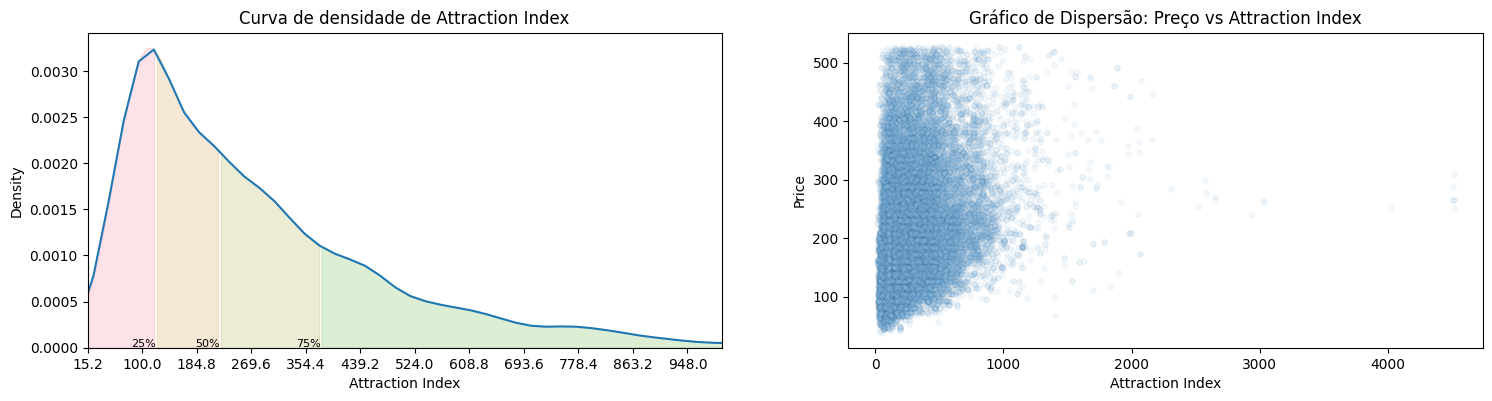


A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)



count    38819.000000
mean       285.261517
std        233.243625
min         15.152201
25%        120.989435
50%        220.484109
75%        377.343377
max       4513.563486
Name: Attraction Index, dtype: float64

In [284]:
#variável analisada
var = 'Attraction Index'

# Selecionar a coluna da variável
data = df_1_quant[var]

# Figura com 2 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 9))

#### Gráfico 1: Curva de densidade da variável analisada
sns.kdeplot(data, fill=False, ax=axs[0, 0])
# titulos
axs[0, 0].set_title(f"Curva de densidade de {var}")
# Calcular os quartis
q = np.arange(0, 101, 25)
q_values = np.percentile(data, q)
# Calcular a curva de densidade usando a gaussian_kde
density_curve = gaussian_kde(data)
# Definir os valores de x e y para preencher a aéra abaixo da curva
x = np.linspace(min(data), max(data), 1000)
y = density_curve(x)
# cores
colors=sns.color_palette("husl", 9)
# Adicionar a área e os rótulos abaixo da curva de densidade
for i in range(len(q)-1):
  axs[0, 0].fill_between(x, 0, y, where=((x >= q_values[i]) & (x <= q_values[i+1])), alpha=0.2, color=colors[i])
  # Remover o "0%" no começo
  if i > 0:
    axs[0, 0].text(q_values[i], 0.00001, f"{q[i]}%", ha='right', fontsize=8)

# limite max e min de x
axs[0, 0].set_xlim(right=1001, left=min(data))
# Marcar cada número no eixo X
axs[0, 0].set_xticks(np.arange(min(data), 1001, step=84.8))

#### Gráfico 2: Gráfico de Dispersão entre a variável analisada e o Preço
sns.scatterplot(data=df_1_quant, x=var, y="Price", s=15, color='#94c2ea', edgecolor='#024a77', linewidth=0.3, alpha=0.1, ax=axs[0, 1])
# titulo
axs[0, 1].set_title(f"Gráfico de Dispersão: Preço vs {var}")

# Deixar somente 2 gráficos
axs[1, 0].remove()
axs[1, 1].remove()
plt.show()




# Teste de Normalidade do Preço
k2, p  = stt.normaltest(df_1_quant[var])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
print()
if p < 0.05:
    print("A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)")
else:
    print("A hipótese nula não pode ser rejeitada (Segue distribuição Normal)")

# Estatísticas descritivas
print()
df_1_quant[var].describe()

A análise do teste de normalidade e do gráfico 1 mostra que a varável não apresenta uma distribuição normal. Com o gráfico de desidade, percebe-se que a variável aparenta apresentar uma distribuição Assimétrica à Direita. 
Destaca-se que 75% das acomodações possuem index de atrações menor do que 377.

Além disso, ao observar o gráfico de dispersão com o preço, percebe-se que aparentemente há uma correlação positiva, uma vez que acomodações com alto index não possuem preços baixos. Contudo, essa correlação deve ser leve pois existem muitas acomodações com alto preço e baixo index.

>>> 3.5) Index de Restaurante (Restraunt Index)



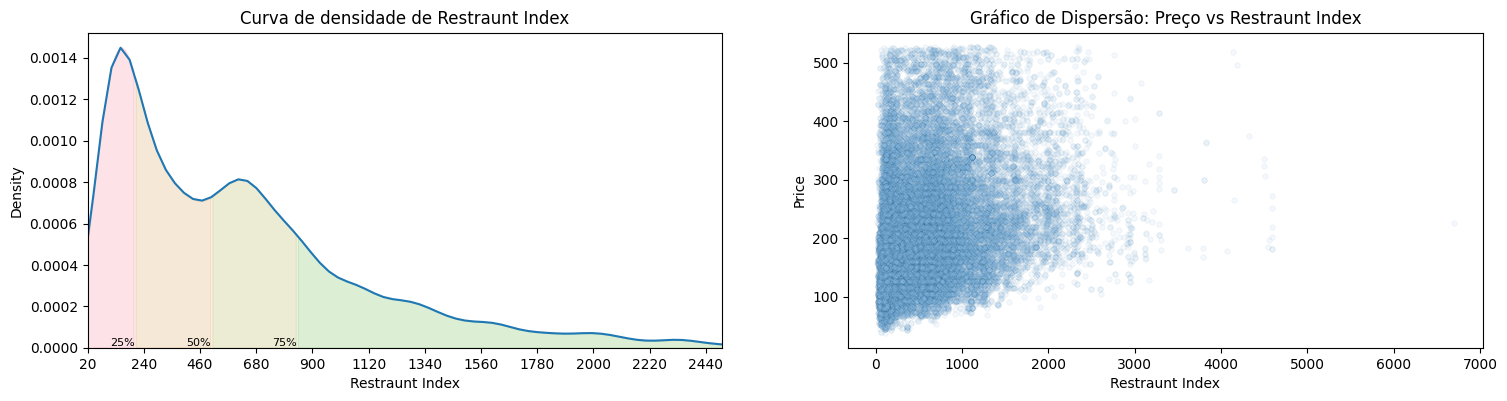


A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)



count    38819.000000
mean       617.586068
std        523.694574
min         19.576924
25%        203.033114
50%        503.194194
75%        840.559261
max       6696.156772
Name: Restraunt Index, dtype: float64

In [285]:
#variável analisada
var = 'Restraunt Index'

# Selecionar a coluna da variável
data = df_1_quant[var]

# Figura com 2 gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 9))

#### Gráfico 1: Curva de densidade da variável analisada
sns.kdeplot(data, fill=False, ax=axs[0, 0])
# titulos
axs[0, 0].set_title(f"Curva de densidade de {var}")
# Calcular os quartis
q = np.arange(0, 101, 25)
q_values = np.percentile(data, q)
# Calcular a curva de densidade usando a gaussian_kde
density_curve = gaussian_kde(data)
# Definir os valores de x e y para preencher a aéra abaixo da curva
x = np.linspace(min(data), max(data), 1000)
y = density_curve(x)
# cores
colors=sns.color_palette("husl", 9)
# Adicionar a área e os rótulos abaixo da curva de densidade
for i in range(len(q)-1):
  axs[0, 0].fill_between(x, 0, y, where=((x >= q_values[i]) & (x <= q_values[i+1])), alpha=0.2, color=colors[i])
  # Remover o "0%" no começo
  if i > 0:
    axs[0, 0].text(q_values[i], 0.00001, f"{q[i]}%", ha='right', fontsize=8)

# limite max e min de x
axs[0, 0].set_xlim(right=2501, left=min(data))
# Marcar cada número no eixo X
axs[0, 0].set_xticks(np.arange(min(data), 2501, step=220))

#### Gráfico 2: Gráfico de Dispersão entre a variável analisada e o Preço
sns.scatterplot(data=df_1_quant, x=var, y="Price", s=15, color='#94c2ea', edgecolor='#024a77', linewidth=0.3, alpha=0.1, ax=axs[0, 1])
# titulo
axs[0, 1].set_title(f"Gráfico de Dispersão: Preço vs {var}")

# Deixar somente 2 gráficos
axs[1, 0].remove()
axs[1, 1].remove()
plt.show()



# Teste de Normalidade do Preço
k2, p  = stt.normaltest(df_1_quant[var])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
print()
if p < 0.05:
    print("A Hipótese Nula pode ser rejeitada (Não segue distribuição Normal)")
else:
    print("A hipótese nula não pode ser rejeitada (Segue distribuição Normal)")

# Estatísticas descritivas
print()
df_1_quant[var].describe()

A análise do teste de normalidade e do gráfico 1 mostra que a varável não apresenta uma distribuição normal. Com o gráfico de desidade, percebe-se que a variável aparenta apresentar uma distribuição Assimétrica à Direita. 
Destaca-se que 75% das acomodações possuem index de restaurante menor do que 840.

Além disso, ao observar o gráfico de dispersão com o preço, percebe-se que aparentemente há uma correlação positiva, uma vez que acomodações com alto index não possuem preços baixos. Contudo, essa correlação deve ser leve pois existem muitas acomodações com alto preço e baixo index.

>>> 3.6) Matriz de Correlações das variáveis quantitativas

<Axes: >

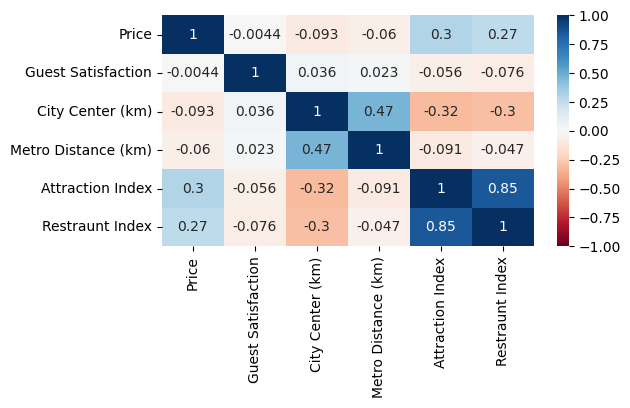

In [286]:
# Tamanho da Figura
fig, ax = plt.subplots(figsize=(6,3)) 
# Matriz de correlações
sns.heatmap(df_1_quant.corr(), annot = True, cmap='RdBu', vmin=-1, vmax=1, ax=ax)

Ao observar a Matriz de correlações acima, confirma-se o que foi levantado nos tópicos anteriores: Guest Satisfaction, City Center (km), Metro Distance (km) não possuem correlação com o preço e Attraction Index e Restraunt Index possuem uma leve correlação positiva com o preço.

Além disso, percebe-se que há multicolinearidade alta entre Attraction Index e Restraunt Index.

___________________________________________________________


**C) Pré-processamento de dados**

In [287]:
# Observar as primeiras linhas
df_1.head(10)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,Amsterdam,215.124317,Weekday,Private room,False,True,2.0,False,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
6,Amsterdam,276.521454,Weekday,Private room,False,True,2.0,False,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478
7,Amsterdam,319.640053,Weekday,Private room,False,True,2.0,True,1,0,10.0,97.0,1,2.182707,1.590381,191.501339,10.140123,229.297401,15.977773
8,Amsterdam,209.031472,Weekday,Private room,False,True,2.0,False,1,0,8.0,96.0,1,7.304535,3.720814,59.776181,3.165188,75.701057,5.274959
9,Amsterdam,368.851499,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,1.031101,0.557885,359.921932,19.058105,439.950562,30.656388


In [288]:
# importar bibliotecas de pré-processamento
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



> 1) Limpeza de dados



In [289]:
# Remover as colunas que já vieram normalizadas e as colunas redundantes
df_limp = df_1.drop(['Normalised Attraction Index', 'Normalised Restraunt Index', 'Shared Room', 'Private Room'], axis=1)

# formatar variáveis como número inteiro
df_limp['Person Capacity'] = df_limp['Person Capacity'].astype(int)
df_limp['Superhost'] = df_limp['Superhost'].astype(int)
df_limp['Multiple Rooms'] = df_limp['Multiple Rooms'].astype(int)
df_limp['Business'] = df_limp['Business'].astype(int)
df_limp['Cleanliness Rating'] = df_limp['Cleanliness Rating'].astype(int)
df_limp['Bedrooms'] = df_limp['Bedrooms'].astype(int)

# ver a tabela
df_limp

,City,Price,Day,Room Type,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,2,0,1,0,10,93.0,1,5.022964,2.539380,78.690379,98.253896
1,Amsterdam,344.245776,Weekday,Private room,4,0,0,0,8,85.0,1,0.488389,0.239404,631.176378,837.280757
2,Amsterdam,264.101422,Weekday,Private room,2,0,0,1,9,87.0,1,5.748312,3.651621,75.275877,95.386955
3,Amsterdam,433.529398,Weekday,Private room,4,0,0,1,9,90.0,2,0.384862,0.439876,493.272534,875.033098
4,Amsterdam,485.552926,Weekday,Private room,2,1,0,0,10,98.0,1,0.544738,0.318693,552.830324,815.305740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38814,Vienna,463.501858,Weekend,Entire home/apt,5,0,1,0,10,90.0,2,1.021878,0.285141,176.754900,283.426459
38815,Vienna,115.933899,Weekend,Private room,4,0,1,0,9,94.0,1,3.041932,0.308192,109.751387,208.517887
38816,Vienna,304.793960,Weekend,Entire home/apt,2,0,0,0,8,86.0,1,0.810205,0.100839,204.970121,342.182813
38817,Vienna,301.054157,Weekend,Private room,2,0,0,0,10,87.0,1,3.044100,0.287435,109.236574,158.563398


> 2) Transformação de dados

>> 2.1) Normalizar variáveis quantitativas

In [290]:
# definir colunas para normalizar
cols_to_norm = ['Guest Satisfaction', 'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Restraunt Index']

# definir o scaler
scaler = preprocessing.MinMaxScaler()

# Normalizar variáveis quantitativas
df_norm = scaler.fit_transform(df_limp[cols_to_norm])

# converter colunas normalizadas em dataframe
df_norm = pd.DataFrame(df_norm, columns=cols_to_norm)

# concatenar as colunas normalizadas com as demais colunas
df_norm = pd.concat([df_limp.drop(cols_to_norm, axis=1), df_norm], axis=1)

# ver a tabela
df_norm

,City,Price,Day,Room Type,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,Guest Satisfaction,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,2,0,1,0,10,1,0.9125,0.197557,0.177775,0.014125,0.011784
1,Amsterdam,344.245776,Weekday,Private room,4,0,0,0,8,1,0.8125,0.017970,0.016614,0.136943,0.122473
2,Amsterdam,264.101422,Weekday,Private room,2,0,0,1,9,1,0.8375,0.226284,0.255711,0.013366,0.011355
3,Amsterdam,433.529398,Weekday,Private room,4,0,0,1,9,2,0.8750,0.013869,0.030661,0.106286,0.128128
4,Amsterdam,485.552926,Weekday,Private room,2,1,0,0,10,1,0.9750,0.020201,0.022170,0.119526,0.119182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38814,Vienna,463.501858,Weekend,Entire home/apt,5,0,1,0,10,2,0.8750,0.039098,0.019819,0.035924,0.039519
38815,Vienna,115.933899,Weekend,Private room,4,0,1,0,9,1,0.9250,0.119100,0.021434,0.021029,0.028299
38816,Vienna,304.793960,Weekend,Entire home/apt,2,0,0,0,8,1,0.8250,0.030715,0.006905,0.042197,0.048319
38817,Vienna,301.054157,Weekend,Private room,2,0,0,0,10,1,0.8375,0.119186,0.019980,0.020915,0.020817


>>2.2) One-hot encoding nas variáveis qualitativas

In [291]:
# definir colunas para encoding
cols_to_encod = ['City', 'Day', 'Room Type', 'Person Capacity', 'Cleanliness Rating']

# definir o encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Encaixar o encoder com os dados para pegar as categorias de cada variável
encoder.fit(df_norm[cols_to_encod])

# transformar as variáveis categóricas com OneHotEncoder
df_encod = encoder.transform(df_norm[cols_to_encod])

# Pegar os nomes das colunas
col_names = encoder.get_feature_names_out(cols_to_encod)

# converter colunas em dataframe e inteiro
df_encod = pd.DataFrame(df_encod.astype(int), columns=col_names.astype(str))

# concatenar as colunas transpostas com as demais colunas
df_pp = pd.concat([df_norm.drop(cols_to_encod, axis=1), df_encod], axis=1)

# ver a tabela
df_pp

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Price,Superhost,Multiple Rooms,Business,Bedrooms,Guest Satisfaction,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Person Capacity_2,Person Capacity_3,Person Capacity_4,Person Capacity_5,Person Capacity_6,Cleanliness Rating_2,Cleanliness Rating_3,Cleanliness Rating_4,Cleanliness Rating_5,Cleanliness Rating_6,Cleanliness Rating_7,Cleanliness Rating_8,Cleanliness Rating_9,Cleanliness Rating_10
0,194.033698,0,1,0,1,0.9125,0.197557,0.177775,0.014125,0.011784,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,344.245776,0,0,0,1,0.8125,0.017970,0.016614,0.136943,0.122473,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,264.101422,0,0,1,1,0.8375,0.226284,0.255711,0.013366,0.011355,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,433.529398,0,0,1,2,0.8750,0.013869,0.030661,0.106286,0.128128,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,485.552926,1,0,0,1,0.9750,0.020201,0.022170,0.119526,0.119182,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38814,463.501858,0,1,0,2,0.8750,0.039098,0.019819,0.035924,0.039519,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
38815,115.933899,0,1,0,1,0.9250,0.119100,0.021434,0.021029,0.028299,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
38816,304.793960,0,0,0,1,0.8250,0.030715,0.006905,0.042197,0.048319,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
38817,301.054157,0,0,0,1,0.8375,0.119186,0.019980,0.020915,0.020817,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


Explicações das etapas de Pré-processamento de dados:


*   Limpeza:
 1. Remoção de outliers. Foi realizada e explicada durante a análise de dados.
 2. Remoção das colunas que já vieram normalizadas, uma vez não foi aplicada uma normalização de intervalo entre 0 e 1 (não há informação do método aplicado) e remoção das colunas redundantes ('Shared Room' e 'Private Room' possuem sua informação contida em 'Room Type').
 3. Não foi necessário o tratamento de missings pois não há valores faltantes na base de dados.




*   Transformação de dados:
 1. Normalização das variáveis 'Guest Satisfaction', 'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Restraunt Index'. Estas variáveis são quantitativas e cada uma apresenta intervalos distintos. Com o intúito de melhor a convergência do modelo, colocar todas as variáveis em uma mesma escala e reduzir o efeito dos outliers, foi realizada normalização nestas colunas. Optou-se pela Normalização pois nenhuma das 5 variáveis possui distribuição normal.
 2. One-hot encoding aplicado nas variáveis 'City', 'Day', 'Room Type', 'Person Capacity', 'Cleanliness Rating'. Para que o modelo capture o efeito de cada uma das categorias destas variáveis qualitativas o método de One-hot encoding transpõe cada uma destas categorias em colunas binárias (0=não ou 1=sim).


